In [1]:
from models._loss_functions import *
from models._valuators import *

plt.style.use('config/publication.mplstyle')
cpal = plt.rcParams['axes.prop_cycle'].by_key()['color']
ls = plt.rcParams['axes.prop_cycle'].by_key()['linestyle']
mark = plt.rcParams['axes.prop_cycle'].by_key()['marker']

# Data Valuation Performance

We investigate three use cases and associated loss functions, commonly observed within the machine learning literature; (1) mean estimation/RMSE, (2) quantile estimation/MPL (including median/MAE) and (3) newsvendor cost/NV. We test three different data distributions with different properties; Gaussian (symmetric and unbounded), uniform (symmetric and bounded) and exponential (asymmetric and unbounded). We generate $N = 8$ data sources over 50 trials with location, $\alpha \sim U(10,20)$, and scale, $\beta \sim U(1,5)$ parameters. The target distribution is the Euclidean barycenter of the 8 data sources and we calculate the distances (WD, KLD, JSD, TVD, KS) and loss function values for all 255 combinations of data sources. 

For Gaussian data we have closed-form expression for all the tasks/metrics allowing for efficient computation using distributional parameters. For Exponential and Uniform data metrics are calculated from emprical data.

## Gaussian Data

In [2]:
N_d = 8 # Number of data owners
N_r = 50 # Number of trials
N_s = 10000 # Data source sample size
agg = 'euclidean' # Aggregation method
Z = st.norm # Data distribution
α_bounds = np.array([10, 16]) # Location parameter bounds
β_bounds = np.array([1, 3]) # Scale parameter bounds
seed = 1345 # Reproducibility seed
metrics = [WassersteinMetric(Z=Z), KullbackLieblerDivergence(Z=Z),
           KolmogorovSmirnovMetric(Z=Z), TotalVariationalDistance(Z=Z),
           JensenShannonDistance(Z=Z),
           MeanAbsoluteError(Z=Z), RootMeanSquaredError(Z=Z),
           Newsvendor(Z=Z), MeanPinballLoss(Z=Z, τ=0.9),
           MeanPinballLoss(Z=Z, τ=0.8), MeanPinballLoss(Z=Z, τ=0.7),
           MeanPinballLoss(Z=Z, τ=0.6),MeanPinballLoss(Z=Z, τ=0.5),
           MeanPinballLoss(Z=Z, τ=0.4), MeanPinballLoss(Z=Z, τ=0.3),
           MeanPinballLoss(Z=Z, τ=0.2), MeanPinballLoss(Z=Z, τ=0.1)] # Metrics/Tasks considered
sim = DistValuator(N_d = N_d,
                   N_r = N_r,
                   N_s = N_s,
                   agg = agg,
                   metrics = metrics,
                   Z = Z,
                   α_bounds = α_bounds,
                   β_bounds = β_bounds,
                   seed = seed) # Setup valuation object 

In [4]:
sim.run(path='data/valuation/');

  0%|          | 0/50 [00:00<?, ?it/s]

In [3]:
filepath = 'data/valuation/dist_valuation_st_norm_N_d_8_N_r_50.pkl'
with open(filepath, 'rb') as f:
    sim = pkl.load(f)

### Lipschitz Bound

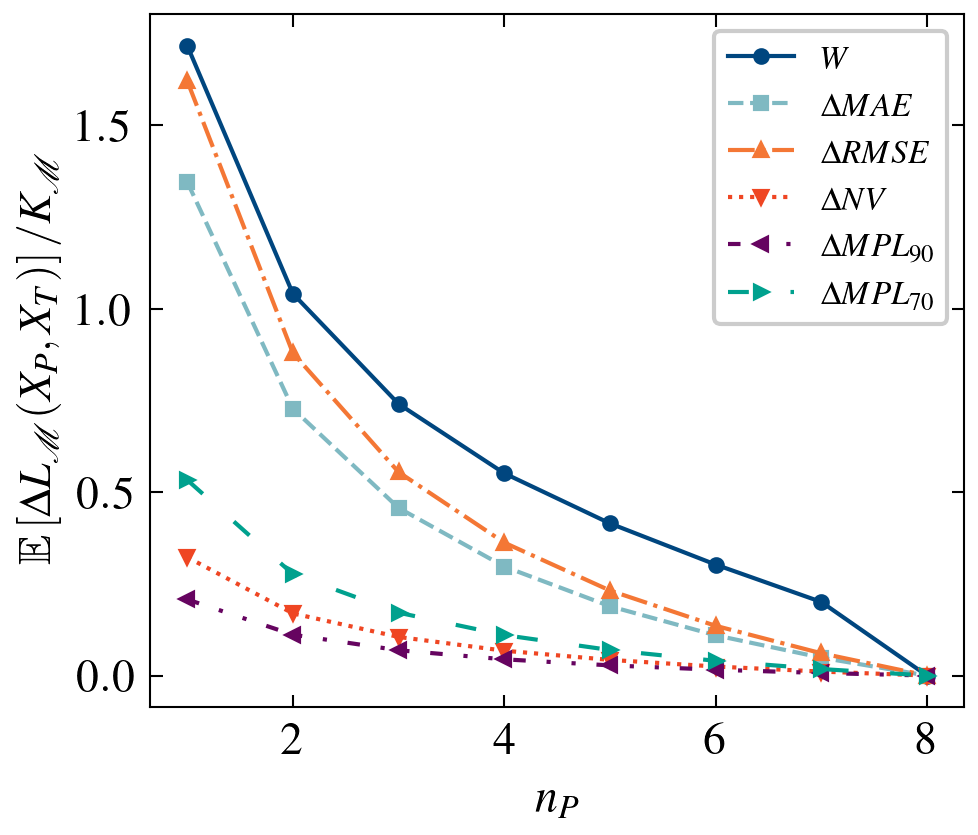

In [4]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx = [0,5,6,7,8,10]
fig, axes = sim.plot_average_metrics(sim.ΔL, sim.K, m_idx, labels, path='figures/valuation/loss_')
axes.set_ylabel(r'$\mathbb{E}\left[\Delta L_{\mathcal{M}}(X_P,X_T)\right]/K_{\mathcal{M}}$')
fig.savefig('figures/valuation/loss_avg_' + sim.gen_path() + '.pdf');

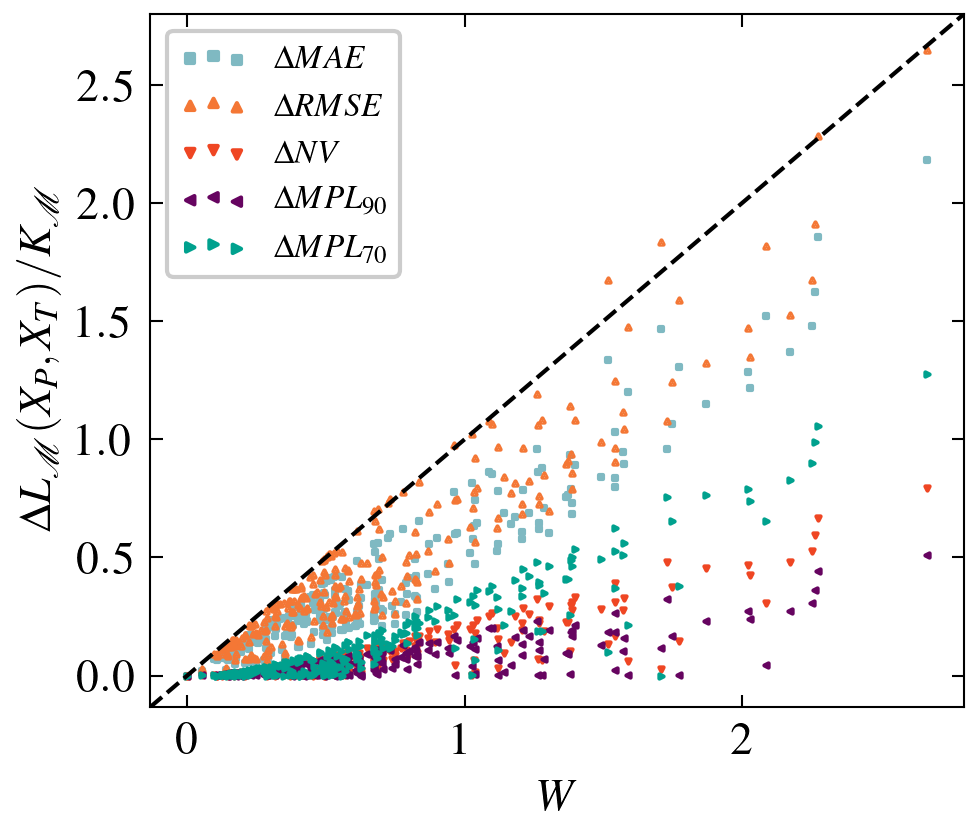

In [7]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx=[0,5,6,7,8,10]
x = 0
r=1
fig, axes = plt.subplots()
for k, i in enumerate(k for k in m_idx if k != x):
    axes.scatter(sim.ΔL[r,x],np.abs(sim.ΔL[r,i]/sim.K[i]),
                 marker=mark[k+1], label=labels[i],
                 s=1, alpha=1, c=cpal[k+1],rasterized=True)
max_x = np.max(sim.ΔL[r,x])
axes.axline((0, 0), (max_x, max_x),  c='k',
            ls='--', zorder=1)
axes.set_xlabel(labels[x])
axes.set_ylabel(r'$\Delta L_{\mathcal{M}}(X_P,X_T)/K_{\mathcal{M}}$')
axes.legend(markerscale=2)
fig.savefig('figures/valuation/loss_scatter_' + sim.gen_path() + '.pdf');

### Task Correlations

(<Figure size 1050x900 with 2 Axes>,
 <Axes: xlabel='Source Metric (S)', ylabel='Target Metric (T)'>)

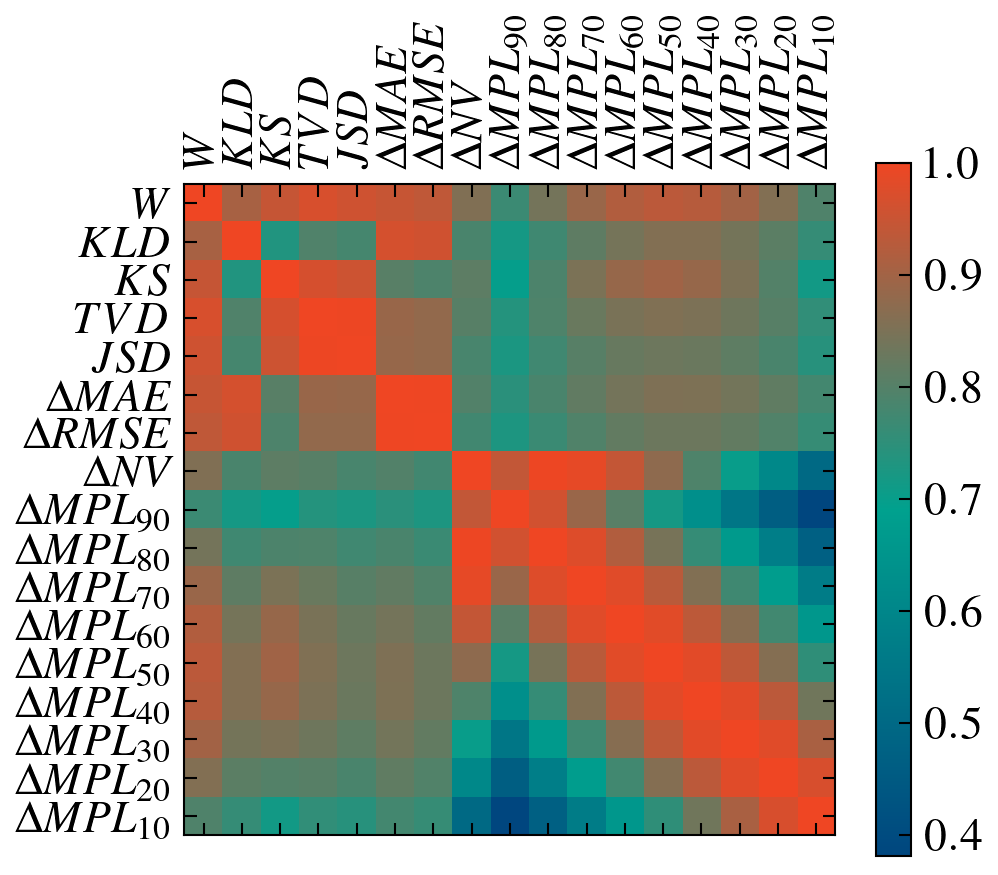

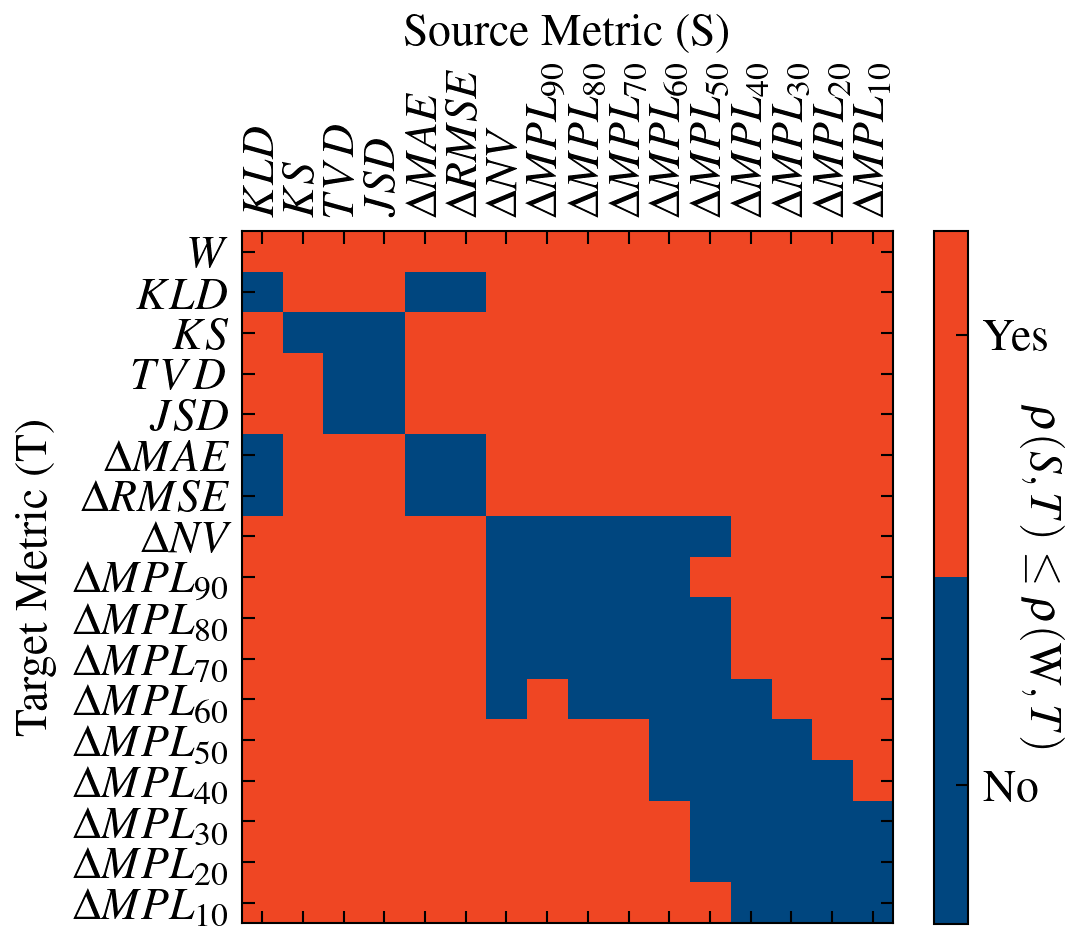

In [5]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx = list(np.arange(17))
sim.plot_correlations(sim.ρ_hat, m_idx, labels,'figures/valuation/')
sim.plot_correlation_performance(sim.ρ_hat, 0,m_idx, labels,'figures/valuation/')

In [6]:
display(pd.DataFrame(sim.ρ_hat, labels, columns = labels))

,$W$,$KLD$,$KS$,$TVD$,$JSD$,$\Delta MAE$,$\Delta RMSE$,$\Delta NV$,$\Delta MPL_{90}$,$\Delta MPL_{80}$,$\Delta MPL_{70}$,$\Delta MPL_{60}$,$\Delta MPL_{50}$,$\Delta MPL_{40}$,$\Delta MPL_{30}$,$\Delta MPL_{20}$,$\Delta MPL_{10}$
$W$,1.000000,0.907033,0.945831,0.968796,0.957596,0.947893,0.938246,0.857263,0.766865,0.840268,0.888671,0.919538,0.932605,0.926266,0.901526,0.859759,0.792951
$KLD$,0.907033,1.000000,0.733537,0.793959,0.780747,0.964737,0.959723,0.786024,0.718297,0.772263,0.813085,0.843284,0.859996,0.859049,0.840907,0.808933,0.759176
$KS$,0.945831,0.733537,1.000000,0.966084,0.954503,0.805035,0.791251,0.811288,0.697424,0.790044,0.849992,0.885854,0.897835,0.885815,0.851970,0.797709,0.714421
$TVD$,0.968796,0.793959,0.966084,1.000000,0.997826,0.887452,0.880238,0.803892,0.737573,0.791757,0.826052,0.847572,0.856476,0.851740,0.834020,0.803873,0.753897
$JSD$,0.957596,0.780747,0.954503,0.997826,1.000000,0.885515,0.880314,0.784273,0.726082,0.773518,0.804093,0.823678,0.832096,0.828226,0.812669,0.786122,0.742152
$\Delta MAE$,0.947893,0.964737,0.805035,0.887452,0.885515,1.000000,0.998397,0.796361,0.745128,0.785911,0.817055,0.840385,0.853457,0.853079,0.839648,0.815760,0.777820
$\Delta RMSE$,0.938246,0.959723,0.791251,0.880238,0.880314,0.998397,1.000000,0.775264,0.729380,0.765557,0.794925,0.817752,0.830960,0.831008,0.818248,0.795662,0.760785
$\Delta NV$,0.857263,0.786024,0.811288,0.803892,0.784273,0.796361,0.775264,1.000000,0.941423,0.997452,0.989144,0.944006,0.875383,0.792346,0.701643,0.606589,0.501065
$\Delta MPL_{90}$,0.766865,0.718297,0.697424,0.737573,0.726082,0.745128,0.729380,0.941423,1.000000,0.961800,0.889029,0.805660,0.718655,0.630832,0.544861,0.462679,0.380816
$\Delta MPL_{80}$,0.840268,0.772263,0.790044,0.791757,0.773518,0.785911,0.765557,0.997452,0.961800,1.000000,0.976471,0.920539,0.845390,0.759177,0.667804,0.574193,0.472681


### Hoeffding Bounds

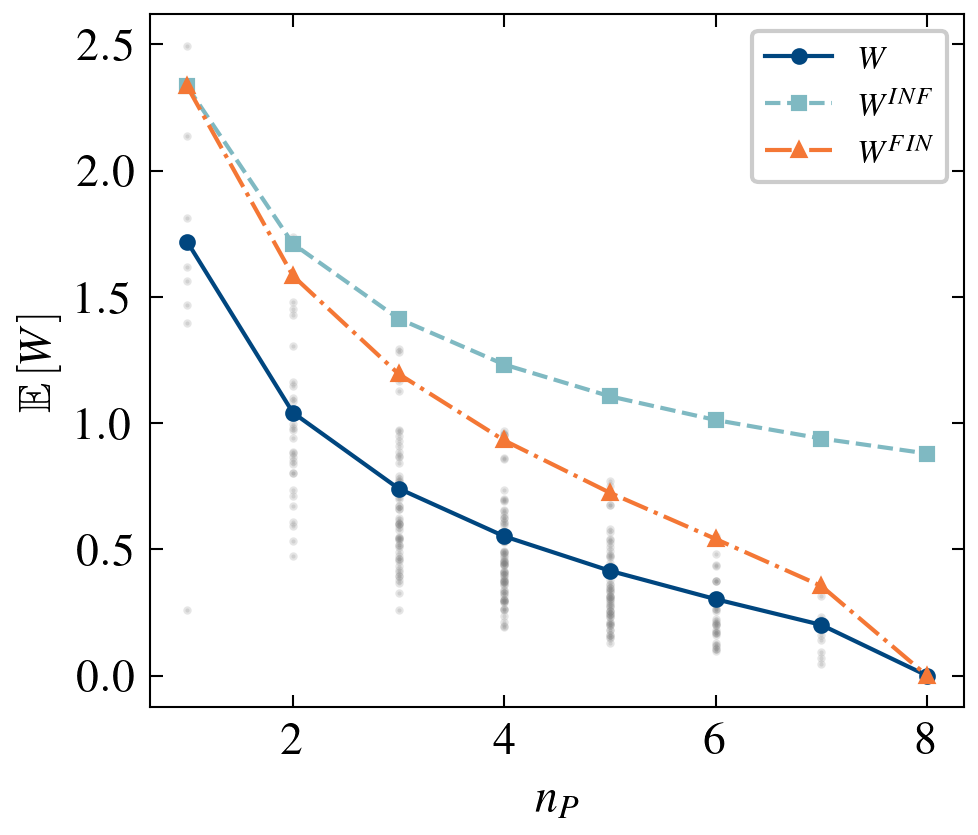

In [7]:
# Hoeffding bound calculation
s_δ = [0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1]
W_inf = np.zeros((len(s_δ),sim.N_r, sim.N_c))
W_fin = np.zeros_like(W_inf)
W_i = sim.L[:,0,:sim.N_d]
for i,δ in enumerate(s_δ):
    hoef = HoeffdingBound(N=sim.N_d, δ=δ)
    for r in range(sim.N_r):
        W_inf[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='inf')
                             for c in sim.C])
        W_fin[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='fin')
                             for c in sim.C])
            
labels = labels + ["$W^{INF}$","$W^{FIN}$"]

ΔL = np.column_stack([sim.ΔL,np.stack([W_inf[1],W_fin[1]], axis=1)])
K = np.hstack((sim.K, [1,1]))
m_idx = [0, 17, 18]
fig, axes = sim.plot_average_metrics(ΔL, K, m_idx, labels, path='figures/valuation/hoef_bound_')
axes.scatter(sim.C_n, sim.ΔL[0,0], c='grey', alpha = 0.2, s=1)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
fig.savefig('figures/valuation/hoef_bound_avg_' + sim.gen_path() + '.pdf')

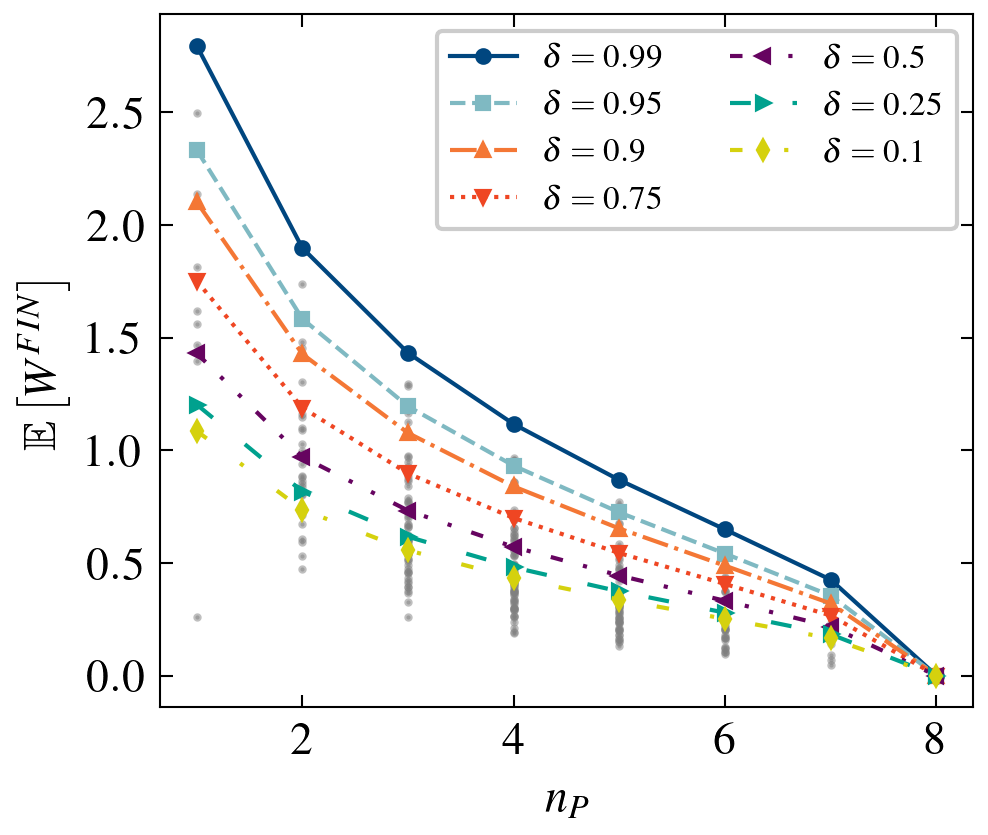

In [8]:
plt.rcParams.update({'legend.fontsize': 8})
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_fin[k][:, sim.C_n == j + 1])
                    for j in range(sim.N_d)])
    axes.plot(np.arange(1, sim.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim.C_n, sim.ΔL[0,0], color = 'grey', 
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim.ΔL[:, i][:,sim.C_n == j+1])
                            for j in range(sim.N_d)])
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{FIN}\right]$')
axes.legend(ncol=2);
fig.savefig('figures/valuation/hoef_delta_fin_avg_' + sim.gen_path() + '.pdf')

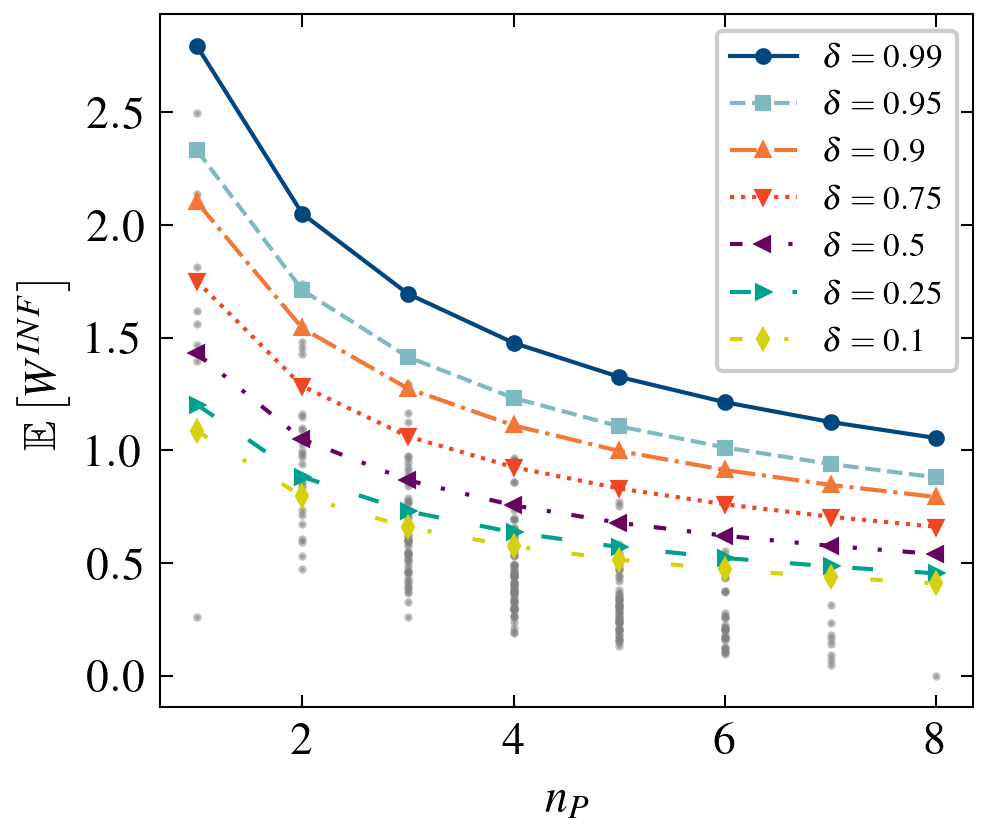

In [9]:
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_inf[k][:, sim.C_n == j + 1])
                    for j in range(sim.N_d)])
    axes.plot(np.arange(1, sim.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim.C_n, sim.ΔL[0,0], color = 'grey',
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim.ΔL[:, i][:,sim.C_n == j+1])
                            for j in range(sim.N_d)])
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{INF}\right]$')
axes.legend();
fig.savefig('figures/valuation/hoef_delta_inf_avg_' + sim.gen_path() + '.pdf')

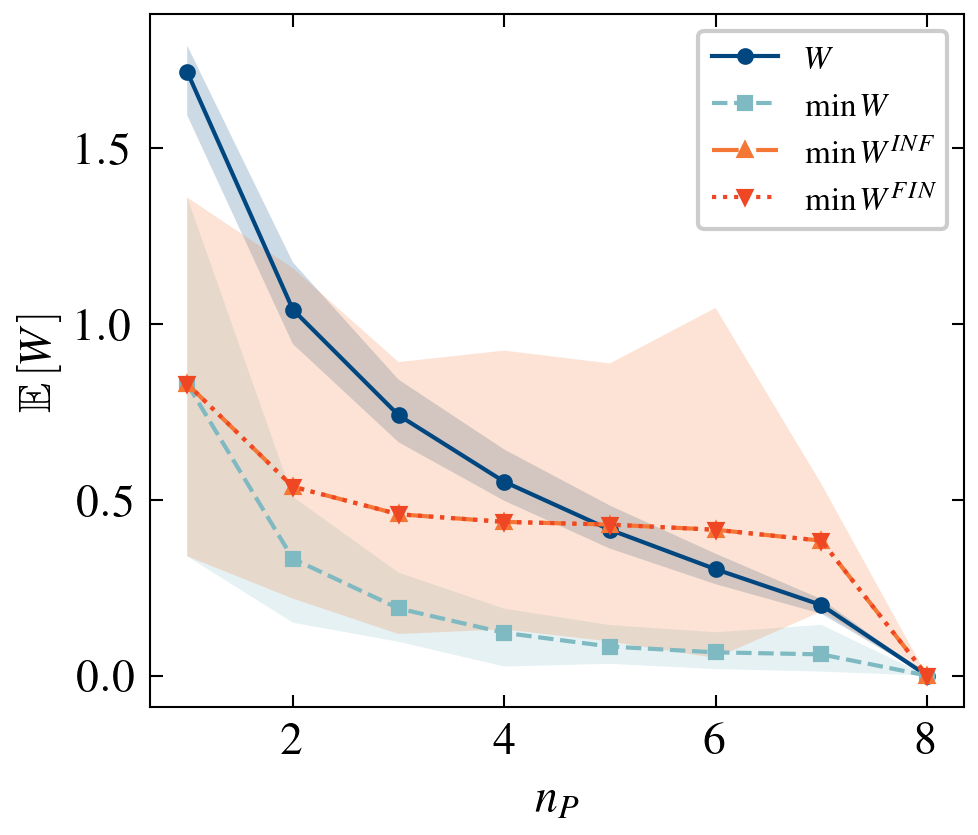

In [10]:
labels =  ["$\min W$", "$\min W^{INF}$",
           "$\min W^{FIN}$"]
fig, axes = plt.subplots()
m_idx = [0, 17, 18]
i=0
r = 1
E_W = np.array([np.mean(ΔL[:, i],axis=0)[sim.C_n == j + 1].mean() for j in range(sim.N_d)])
E_W_u = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim.C_n == j + 1],q=0.975,axis=0) for j in range(sim.N_d)])
E_W_l = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim.C_n == j + 1],q=0.025,axis=0) for j in range(sim.N_d)])
axes.plot(np.arange(1, sim.N_d + 1), E_W / K[i], label="$W$")
axes.fill_between(np.arange(1, sim.N_d + 1), E_W_l / K[i],E_W_u / K[i], alpha = 0.2)
# axes.scatter(sim.C_n, ΔL[r, i], alpha = 0.2, s=1, c='grey')
for k, i in enumerate(m_idx):
    E_L = np.zeros((sim.N_r, sim.N_d))
    E_L_u = np.zeros((sim.N_r, sim.N_d))
    E_L_l = np.zeros((sim.N_r, sim.N_d))
    for r in range(sim.N_r):
        E_L[r] = np.array([
            ΔL[r, 0][sim.C_n == j + 1][
                np.argmin(ΔL[r, i][sim.C_n == j + 1])
        ]
        for j in range(sim.N_d)
        ])
    axes.plot(np.arange(1, sim.N_d + 1), E_L.mean(axis=0) / K[i],
              label=labels[k])
    if k <= 1:
        axes.fill_between(np.arange(1, sim.N_d + 1), np.quantile(E_L,q=0.025,axis=0), np.quantile(E_L,q=0.975,axis=0) / K[i],
                  alpha=0.2)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
axes.set_xlabel(r'$n_P$')
axes.legend()
fig.savefig('figures/valuation/hoef_bound_min_' + sim.gen_path() + '.pdf')

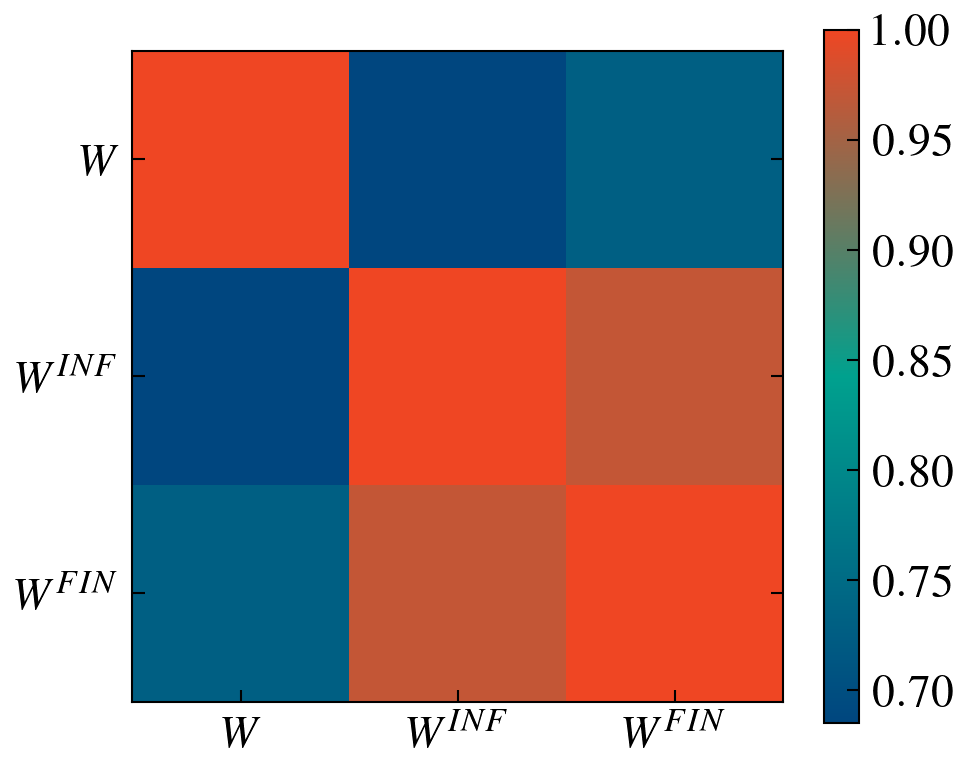

In [11]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$",
          r"$W^{INF}$",
          r"$W^{FIN}$"
          ]
m_idx = [0,17,18]
ρ = np.zeros((sim.N_r, ΔL.shape[1], ΔL.shape[1]))
for i in range(sim.N_r):
    ρ[i] = sim.calculate_correlation(np.abs(ΔL[i]))
ρ_hat = ρ.mean(axis=0)
fig, axes = sim.plot_correlations(ρ_hat, m_idx, labels,'figures/valuation/hoef_', rotation=0, place='bottom')

### Shapley Allocations

In [12]:
L_r = np.max(ΔL,axis=2)
Φ=np.zeros((sim.N_r, ΔL.shape[1], sim.N_d))
Φ_w=np.zeros((sim.N_r, ΔL.shape[1], sim.N_d))
Φ_perc=np.zeros((sim.N_r, ΔL.shape[1], sim.N_d))
for i in tqdm(range(sim.N_r)):
    for j in range(ΔL.shape[1]):
        Φ[i,j] = sim.shapley(L_r[i,j]-ΔL[i, j],
                             np.ones(sim.N_d))
        Φ_w[i,j] = sim.shapley(L_r[i,j]-K[j]*ΔL[i, 0],
                             np.ones(sim.N_d))
        Φ_perc[i,j] = Φ[i,j]/Φ[i,j].sum()

  0%|          | 0/50 [00:00<?, ?it/s]

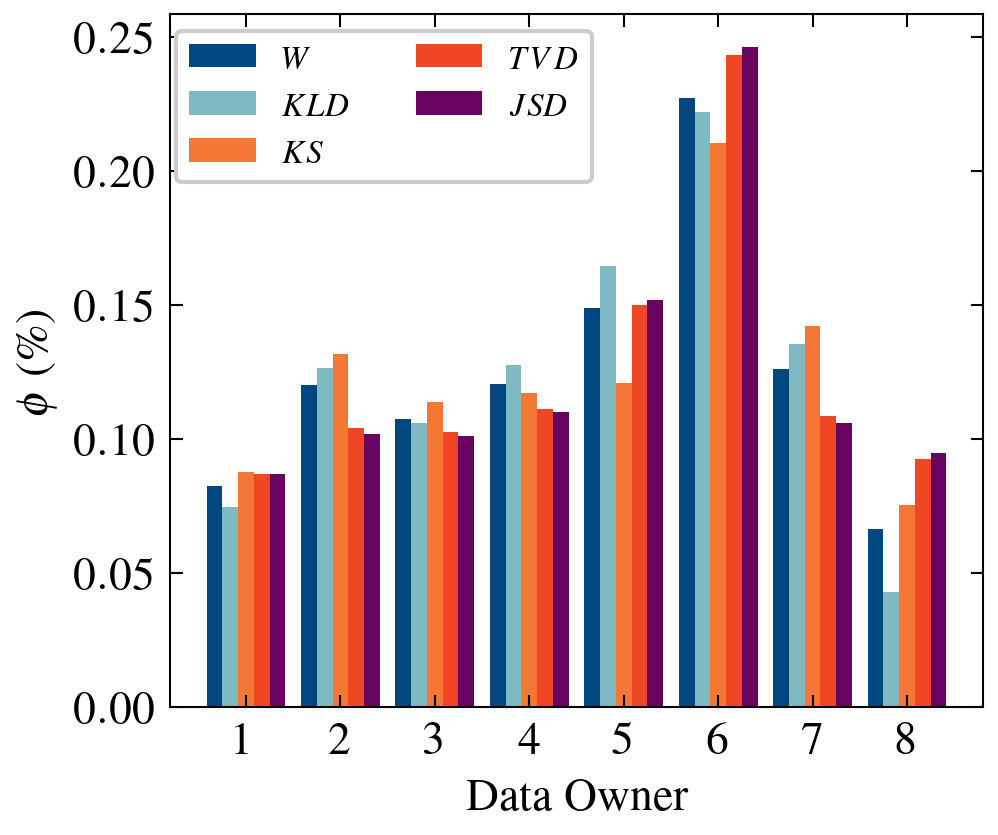

In [13]:
r=0
fig, axes = plt.subplots()
m_idx = [0,1,2,3,4]
N_m = len(m_idx)
for k,i in enumerate(m_idx):
    offset = k - (N_m/2)
    axes.bar(np.arange(sim.N_d) + offset/(N_m+1) + 0.5*(1/(N_m+1)),
             Φ_perc[r, i],
             width=(1/(N_m+1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim.N_d))
axes.set_xticklabels(['${}$'.format(i) 
                      for i in np.arange(1,sim.N_d+1)])
axes.set_ylabel('$\phi$ (\%)')
axes.set_xlabel('Data Owner')
fig.legend(ncol=2, loc = 2, bbox_to_anchor=(0.115,0.88))
fig.savefig('figures/valuation/shapley_dist_' + sim.gen_path() + '.pdf')

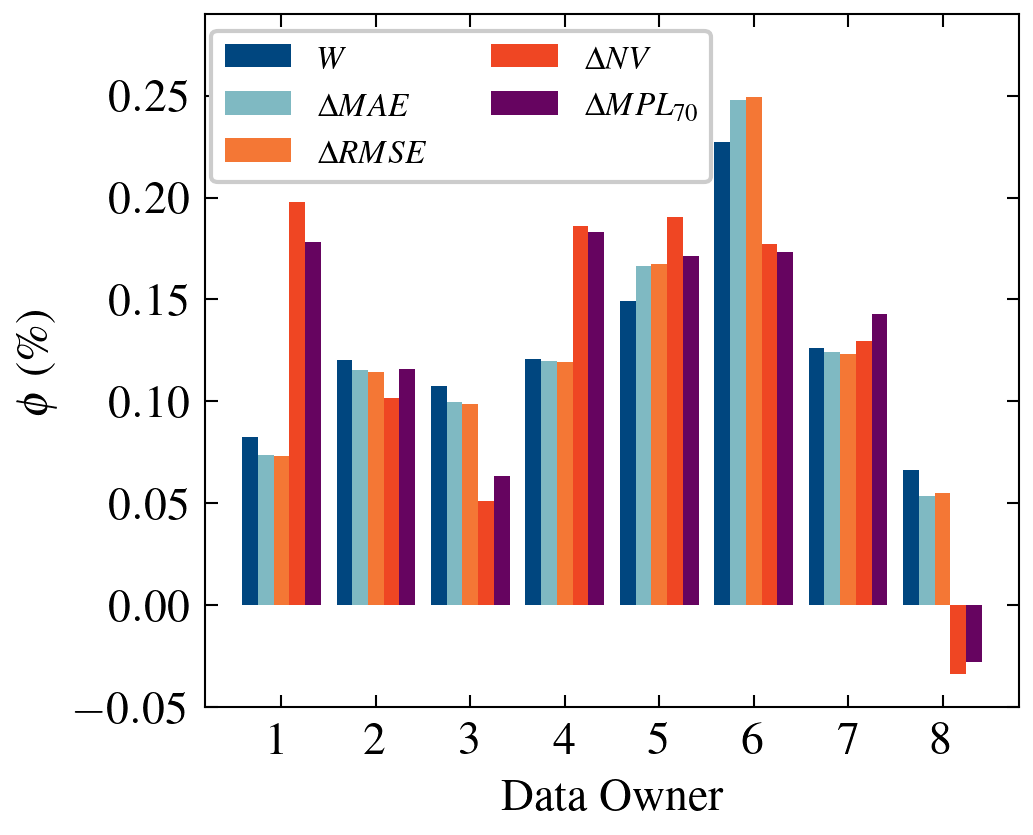

In [14]:
r=0
fig, axes = plt.subplots()
m_idx = [0,5,6,7,10]
N_m = len(m_idx)
for k,i in enumerate(m_idx):
    offset = k - (N_m/2)
    axes.bar(np.arange(sim.N_d) + offset/(N_m+1) + 0.5*(1/(N_m+1)),
             Φ_perc[r, i],
             width=(1/(N_m+1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim.N_d))
axes.set_xticklabels(['${}$'.format(i) 
                      for i in np.arange(1,sim.N_d+1)])
axes.set_ylabel('$\phi$ (\%)')
axes.set_xlabel('Data Owner')
axes.set_ylim([-0.05,0.29])
fig.legend(ncol=2, loc = 2, bbox_to_anchor=(0.115,0.88))
fig.savefig('figures/valuation/shapley_loss_' + sim.gen_path() + '.pdf')

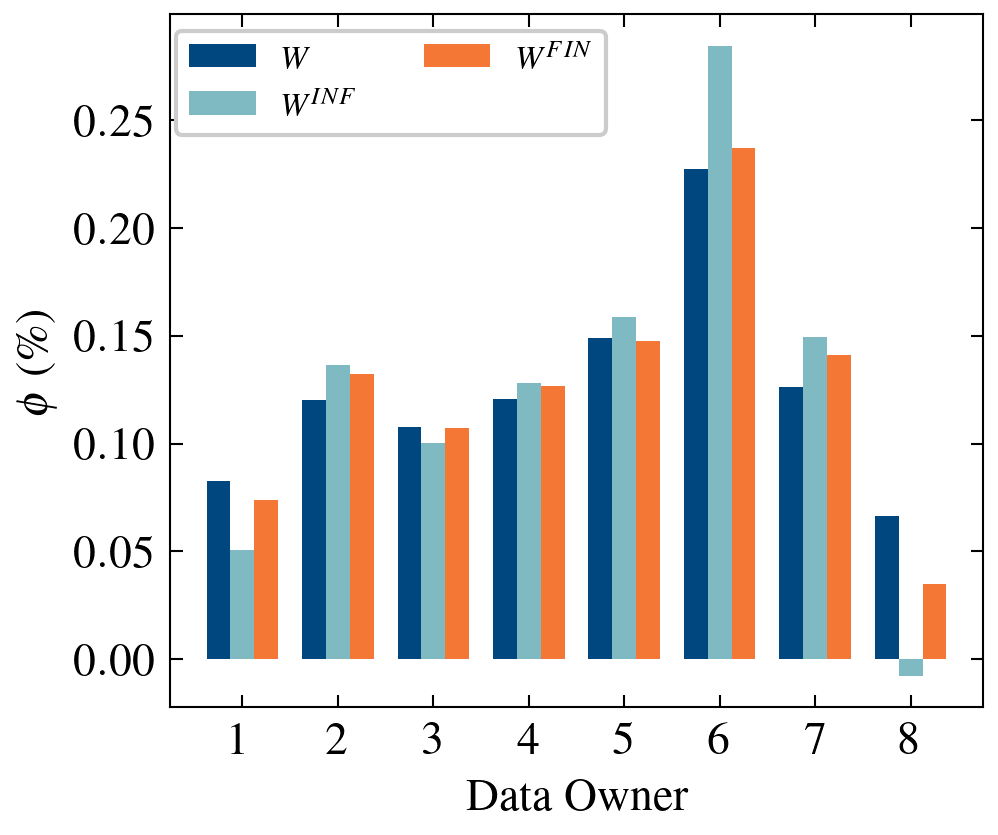

In [15]:
r=0
fig, axes = plt.subplots()
m_idx = [0,17,18]
N_m = len(m_idx)
for k,i in enumerate(m_idx):
    offset = k - (N_m/2)
    axes.bar(np.arange(sim.N_d) + offset/(N_m+1) + 0.5*(1/(N_m+1)),
             Φ_perc[r, i],
             width=(1/(N_m+1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim.N_d))
axes.set_xticklabels(['${}$'.format(i) 
                      for i in np.arange(1,sim.N_d+1)])
axes.set_ylabel('$\phi$ (\%)')
axes.set_xlabel('Data Owner')
fig.legend(ncol=2, loc = 2, bbox_to_anchor=(0.115,0.88))
fig.savefig('figures/valuation/shapley_hoef_' + sim.gen_path() + '.pdf')

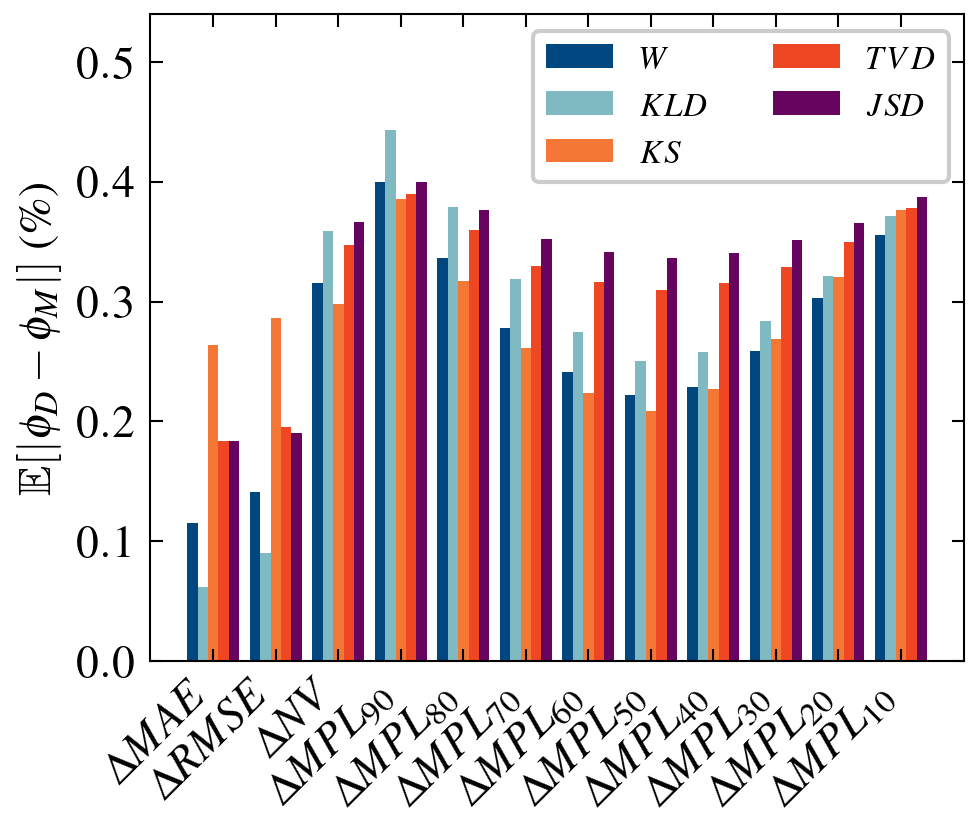

In [16]:
def average_value_difference(Φ, i, m_idx):
    diff = np.zeros(len(m_idx))
    for k,m in enumerate(m_idx):
        diff[k] = np.mean(np.sum(np.abs(Φ[:,i] - Φ[:,m]), axis = 1))
    return diff
d_idx = [0,1,2,3,4]
m_idx = np.arange(5,17)
diff = np.zeros((len(d_idx), len(m_idx)))
fig, axes = plt.subplots(figsize= [3.5,2.8])
for i, x in  enumerate(d_idx):
    diff[i] = average_value_difference(Φ_perc,x, m_idx) 
    offset = i - (len(d_idx)/2)
    axes.bar(
        np.arange(len(m_idx)) + offset/(len(d_idx)+1) + 0.5*(1/(len(d_idx)+1)),
        diff[i],
        width=(1/(len(d_idx)+1)), label=labels[x],align='center')
axes.set_xticks(np.arange(len(m_idx)))
axes.set_xticklabels(np.array(labels)[m_idx], rotation = 45,
                     ha='right')
axes.set_ylabel(r'$\mathbb{E}[\lvert\phi_{D} - \phi_{M}\rvert]$ (\%)')
# axes.set_xlabel('Metric (M)')
axes.set_ylim([0,0.54])
axes.legend(ncols=2, loc = 2, bbox_to_anchor=(0.45,1))
fig.savefig('figures/valuation/shapley_dist_diff_' + sim.gen_path() + '.pdf');

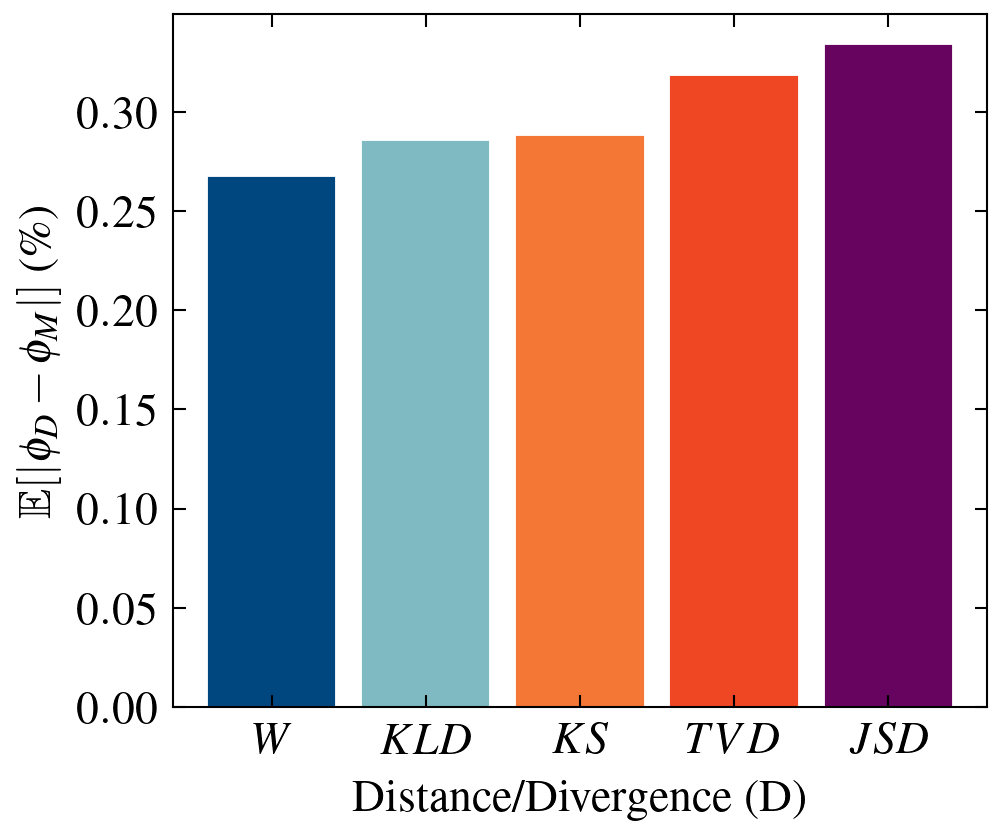

In [17]:
fig, axes = plt.subplots()
bars = axes.bar(np.arange(len(d_idx)),diff.mean(axis=1))
axes.set_xticks(np.arange(len(d_idx)))
axes.set_xticklabels(np.array(labels)[d_idx]);
axes.set_ylabel(r'$\mathbb{E}[\lvert\phi_{D} - \phi_{M}\rvert]$ (\%)')
axes.set_xlabel('Distance/Divergence (D)')
for i,bar in enumerate(bars):
    bar.set_color(cpal[i])
# fig.savefig('figures/valuation/shapley_dist_diff_sum_' + sim.gen_path() + '.pdf');

## Uniform Data

In [18]:
N_d = 8
N_r = 50
N_cf = 1
N_s = 10000
agg = 'euclidean'
Z = st.uniform
α_bounds = np.array([10, 16])
β_bounds = np.array([1, 3])
seed = 1345
metrics = [WassersteinMetric(Z=Z, N_cf=N_cf),
           KullbackLieblerDivergence(Z=Z,N_cf=N_cf, est_mode='kde'),
           KolmogorovSmirnovMetric(Z=Z, N_cf=N_cf),
           TotalVariationalDistance(Z=Z,N_cf=N_cf, est_mode='kde'),
           JensenShannonDistance(Z=Z,N_cf=N_cf, est_mode='kde'),
           MeanAbsoluteError(Z=Z,N_cf=N_cf), 
           RootMeanSquaredError(Z=Z,N_cf=N_cf,
                                a_min= max(np.abs(β_bounds)),
                                b_max= max(α_bounds) + max(β_bounds) - min(α_bounds)),
           Newsvendor(Z=Z,N_cf=N_cf), 
           MeanPinballLoss(Z=Z, τ=0.9,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.8,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.7,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.6,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.5,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.4,N_cf=N_cf), 
           MeanPinballLoss(Z=Z, τ=0.3,N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.2,N_cf=N_cf), 
           MeanPinballLoss(Z=Z, τ=0.1,N_cf=N_cf)]
sim_uniform = DistValuator(N_d = N_d,
                           N_r = N_r,
                           N_s = N_s,
                           agg = agg,
                           metrics = metrics,
                           Z = Z,
                           α_bounds = α_bounds,
                           β_bounds = β_bounds,
                           seed = seed)

In [22]:
sim_uniform.run('data/valuation/');

  0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
filepath = 'data/valuation/dist_valuation_st_uniform_N_d_8_N_r_50.pkl'
with open(filepath, 'rb') as f:
    sim_uniform = pkl.load(f)

### Lipschitz Bounds

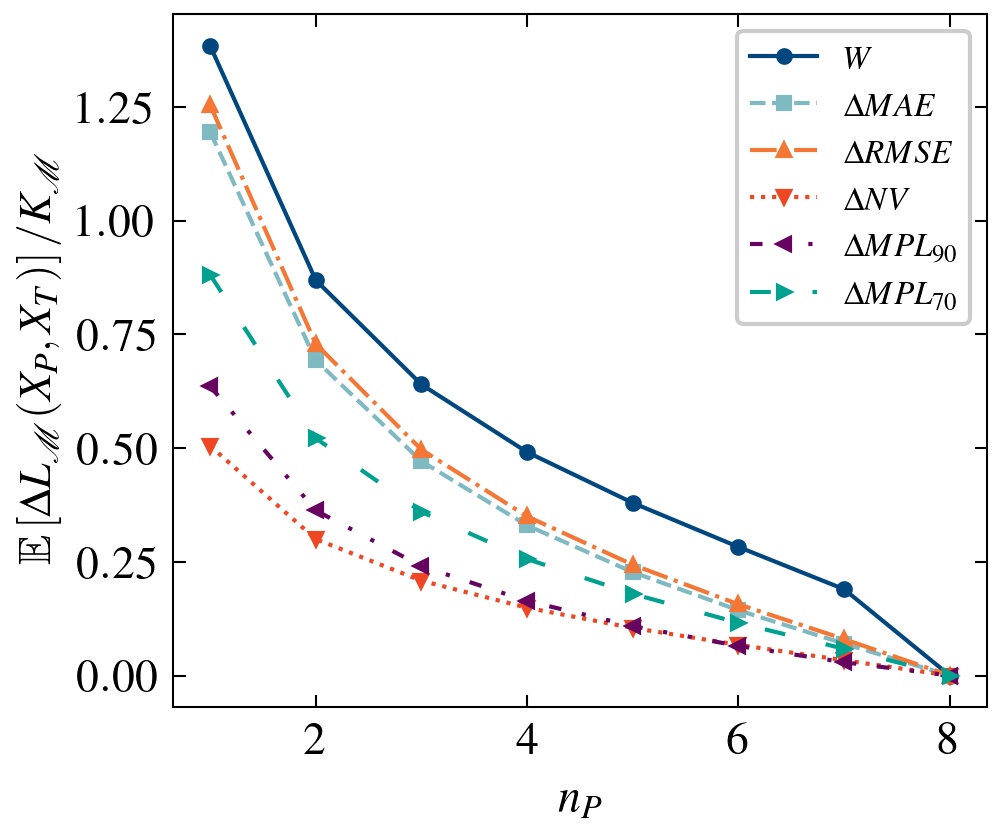

In [20]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx=[0,5,6,7,8,10]
fig, axes = sim_uniform.plot_average_metrics(
    sim_uniform.ΔL, sim_uniform.K,
    m_idx, labels, path='figures/valuation/loss_')
axes.set_ylabel(r'$\mathbb{E}\left[\Delta L_{\mathcal{M}}(X_P,X_T)\right]/K_{\mathcal{M}}$')
fig.savefig('figures/valuation/loss_avg_' + sim_uniform.gen_path() + '.pdf')

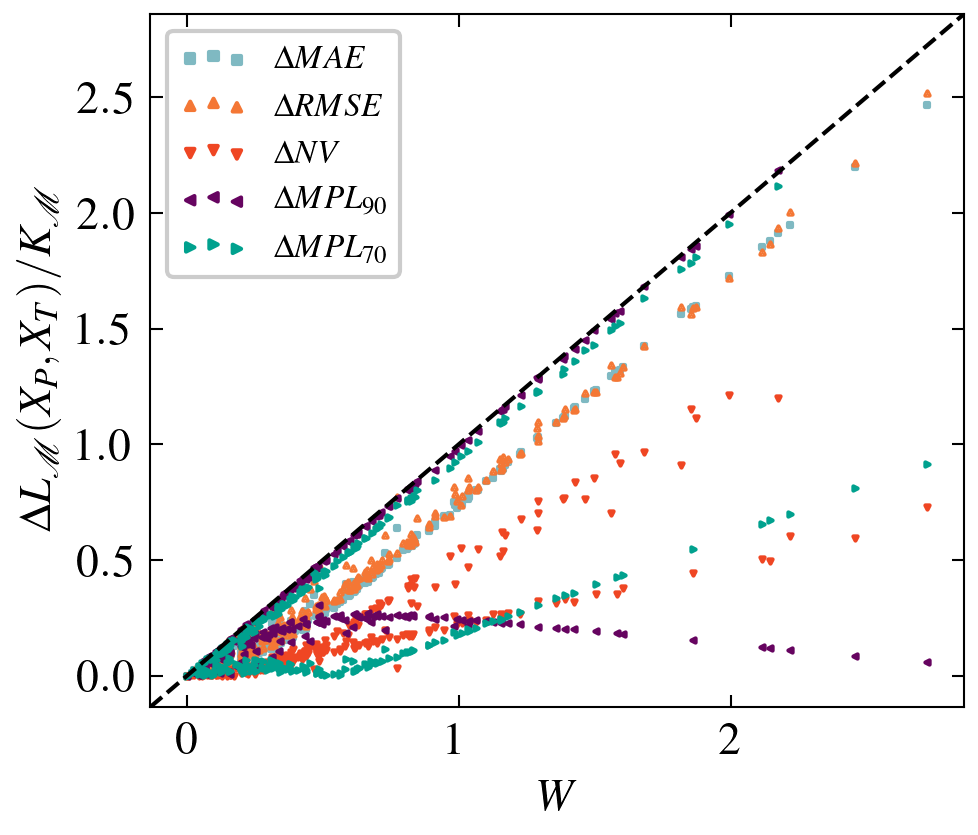

In [21]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx=[0,5,6,7,8,10]
x = 0
r=1
fig, axes = plt.subplots()
for k, i in enumerate(k for k in m_idx if k != x):
    axes.scatter(sim_uniform.ΔL[r,x],np.abs(sim_uniform.ΔL[r,i]/sim_uniform.K[i]),
                 marker=mark[k+1], label=labels[i],
                 s=1, alpha=1, c=cpal[k+1],rasterized=True)
max_x = np.max(sim_uniform.ΔL[r,x])
axes.axline((0, 0), (max_x, max_x),  c='k',
            ls='--', zorder=1)
axes.set_xlabel(labels[x])
axes.set_ylabel(r'$\Delta L_{\mathcal{M}}(X_P,X_T)/K_{\mathcal{M}}$')
axes.legend(markerscale=2)
fig.savefig('figures/valuation/loss_scatter_' + sim_uniform.gen_path() + '.pdf');

### Task Correlations

(<Figure size 1050x900 with 2 Axes>,
 <Axes: xlabel='Source Metric (S)', ylabel='Target Metric (T)'>)

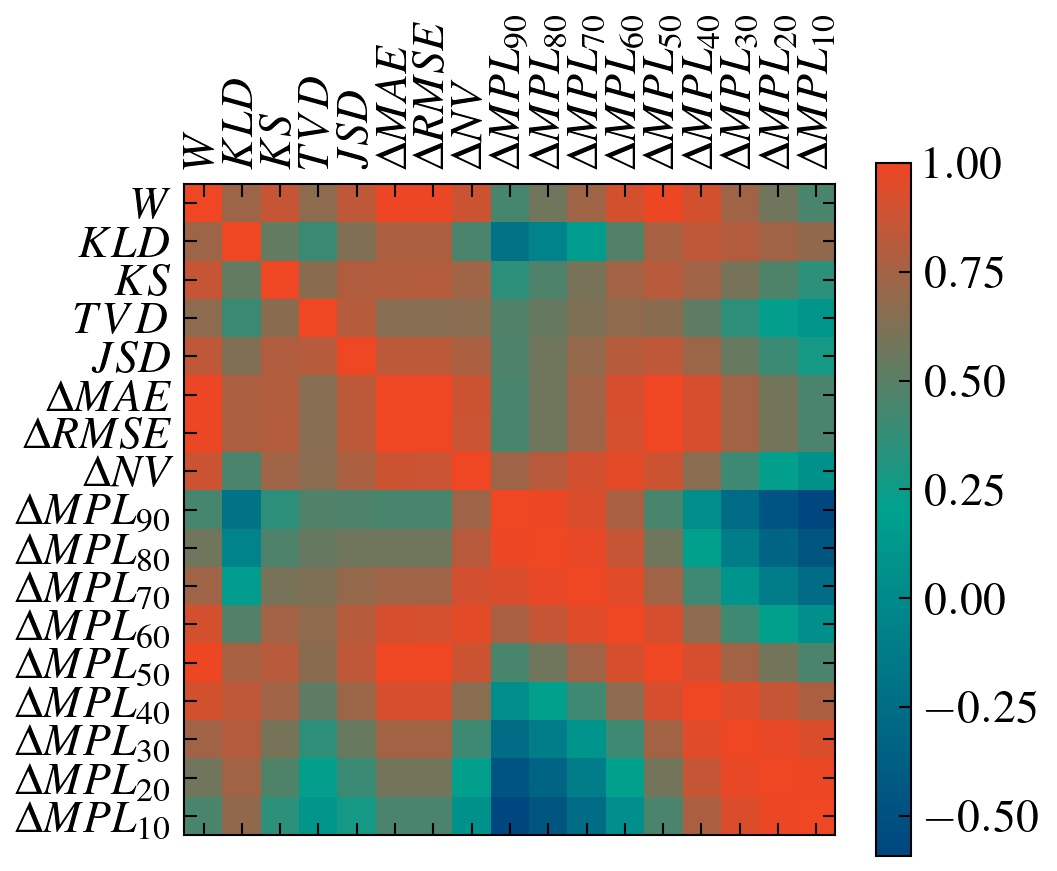

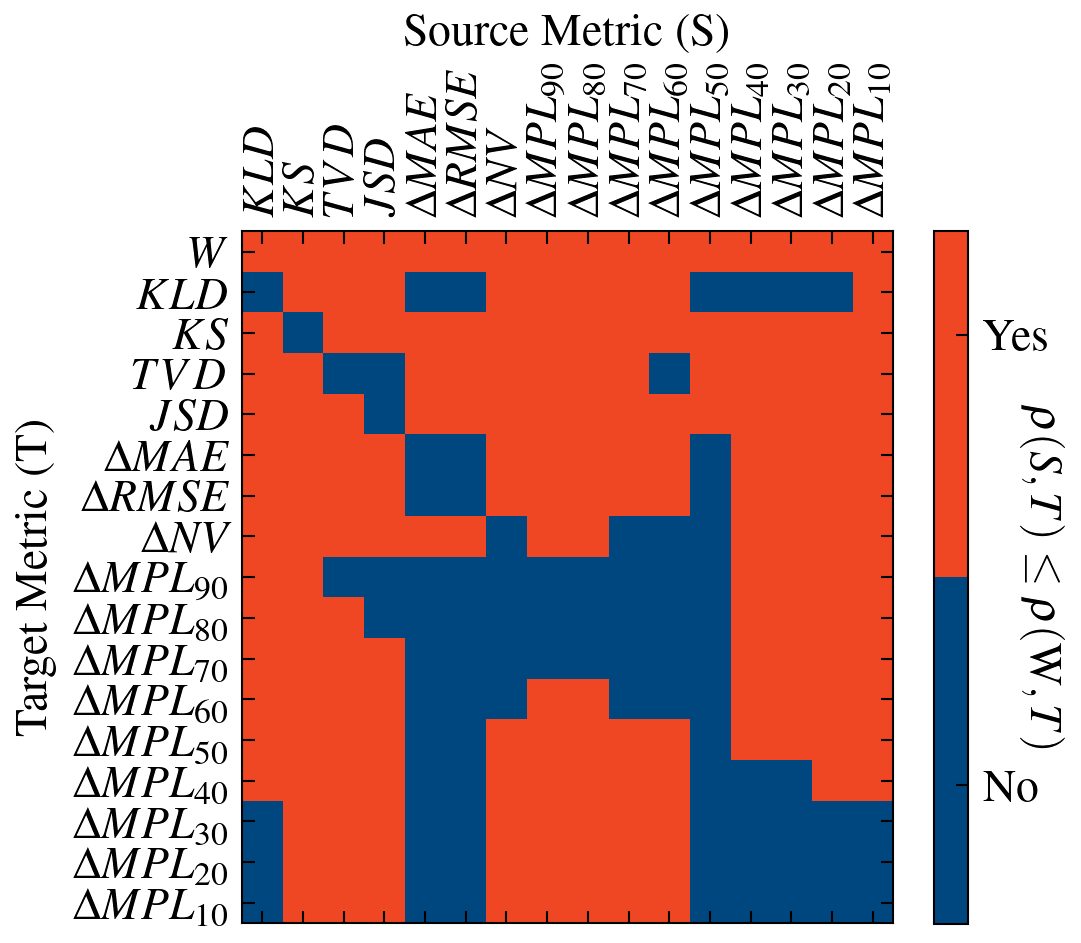

In [22]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx = list(np.arange(17))
sim_uniform.plot_correlations(sim_uniform.ρ_hat, m_idx, labels,'figures/valuation/')
sim_uniform.plot_correlation_performance(sim_uniform.ρ_hat, 0,m_idx, labels,'figures/valuation/')

In [23]:
display(pd.DataFrame(sim_uniform.ρ_hat, labels, columns = labels))

,$W$,$KLD$,$KS$,$TVD$,$JSD$,$\Delta MAE$,$\Delta RMSE$,$\Delta NV$,$\Delta MPL_{90}$,$\Delta MPL_{80}$,$\Delta MPL_{70}$,$\Delta MPL_{60}$,$\Delta MPL_{50}$,$\Delta MPL_{40}$,$\Delta MPL_{30}$,$\Delta MPL_{20}$,$\Delta MPL_{10}$
$W$,1.000000,0.724448,0.863868,0.671219,0.839274,0.990530,0.990136,0.882089,0.439058,0.573682,0.735563,0.907947,0.993566,0.908705,0.739492,0.581076,0.448572
$KLD$,0.724448,1.000000,0.532959,0.399313,0.636441,0.778328,0.773695,0.452309,-0.183708,-0.044825,0.168611,0.481292,0.765617,0.841875,0.799597,0.740792,0.685351
$KS$,0.863868,0.532959,1.000000,0.661204,0.790647,0.795799,0.798368,0.736159,0.352593,0.467680,0.602839,0.744439,0.813148,0.741128,0.599015,0.464986,0.350764
$TVD$,0.671219,0.399313,0.661204,1.000000,0.810325,0.653569,0.653004,0.663979,0.471414,0.545127,0.623538,0.684378,0.660508,0.522504,0.355046,0.218199,0.110713
$JSD$,0.839274,0.636441,0.790647,0.810325,1.000000,0.830598,0.831588,0.770244,0.469124,0.574793,0.695695,0.811002,0.837447,0.720684,0.548398,0.397801,0.274995
$\Delta MAE$,0.990530,0.778328,0.795799,0.653569,0.830598,1.000000,0.998682,0.882054,0.443609,0.577851,0.739990,0.913139,0.999431,0.914416,0.744819,0.586336,0.454283
$\Delta RMSE$,0.990136,0.773695,0.798368,0.653004,0.831588,0.998682,1.000000,0.876116,0.442842,0.577141,0.739257,0.912319,0.998551,0.913695,0.744292,0.585923,0.453875
$\Delta NV$,0.882089,0.452309,0.736159,0.663979,0.770244,0.882054,0.876116,1.000000,0.727960,0.816705,0.905465,0.958130,0.882661,0.656803,0.407687,0.213171,0.065792
$\Delta MPL_{90}$,0.439058,-0.183708,0.352593,0.471414,0.469124,0.443609,0.442842,0.727960,1.000000,0.987528,0.930132,0.768255,0.443331,0.046159,-0.263295,-0.461287,-0.592136
$\Delta MPL_{80}$,0.573682,-0.044825,0.467680,0.545127,0.574793,0.577851,0.577141,0.816705,0.987528,1.000000,0.976249,0.859093,0.577980,0.201340,-0.109901,-0.317709,-0.459882


### Hoeffding Bounds

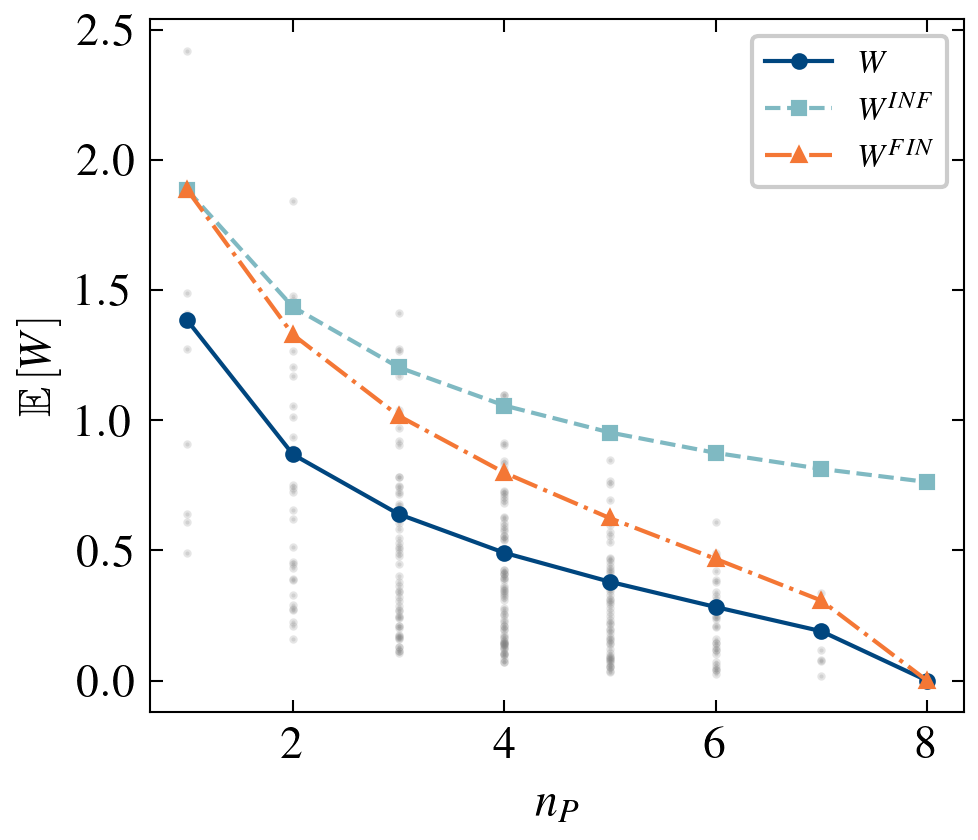

In [24]:
s_δ = [0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1]
W_inf = np.zeros((len(s_δ),sim_uniform.N_r, sim_uniform.N_c))
W_fin = np.zeros_like(W_inf)
W_i = sim_uniform.L[:,0,:sim_uniform.N_d]
for i,δ in enumerate(s_δ):
    hoef = HoeffdingBound(N=sim_uniform.N_d, δ=δ)
    for r in range(sim_uniform.N_r):
        W_inf[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='inf')
                             for c in sim_uniform.C])
        W_fin[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='fin')
                             for c in sim_uniform.C])
            
labels = labels + ["$W^{INF}$","$W^{FIN}$"]

ΔL = np.column_stack([sim_uniform.ΔL,np.stack([W_inf[1],W_fin[1]], axis=1)])
K = np.hstack((sim_uniform.K, [1,1]))
m_idx = [0, 17, 18]
fig, axes = sim_uniform.plot_average_metrics(ΔL, K, m_idx, labels, path='figures/valuation/hoef_bound_')
axes.scatter(sim_uniform.C_n, sim_uniform.ΔL[0,0], c='grey', alpha = 0.2, s=1)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
fig.savefig('figures/valuation/hoef_bound_avg_' + sim_uniform.gen_path() + '.pdf')

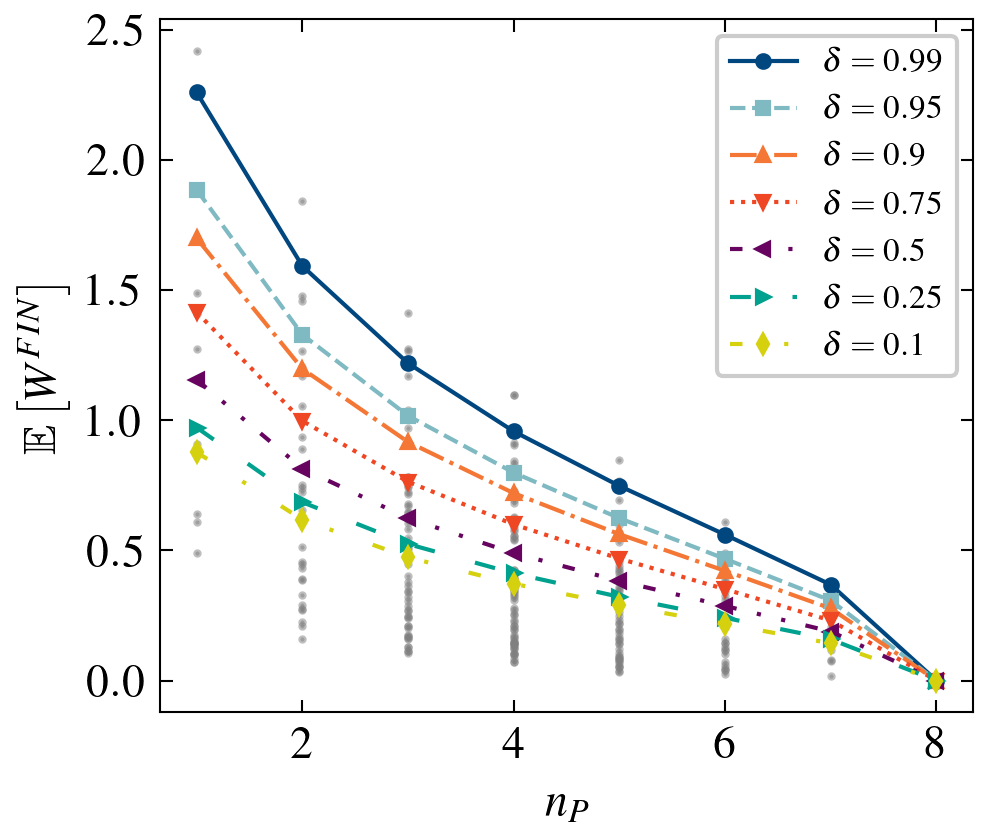

In [25]:
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_fin[k][:, sim_uniform.C_n == j + 1])
                    for j in range(sim_uniform.N_d)])
    axes.plot(np.arange(1, sim_uniform.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim_uniform.C_n, sim_uniform.ΔL[0,0], color = 'grey', 
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim_uniform.ΔL[:, i][:,sim_uniform.C_n == j+1])
                            for j in range(sim_uniform.N_d)])
# axes.plot(np.arange(1, sim.N_d + 1), E_w/ K[i],
#               label=labels[k], c = cpal[0], ls = '-', marker = '')
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{FIN}\right]$')
axes.legend();
fig.savefig('figures/valuation/hoef_delta_fin_avg_' + sim_uniform.gen_path() + '.pdf')

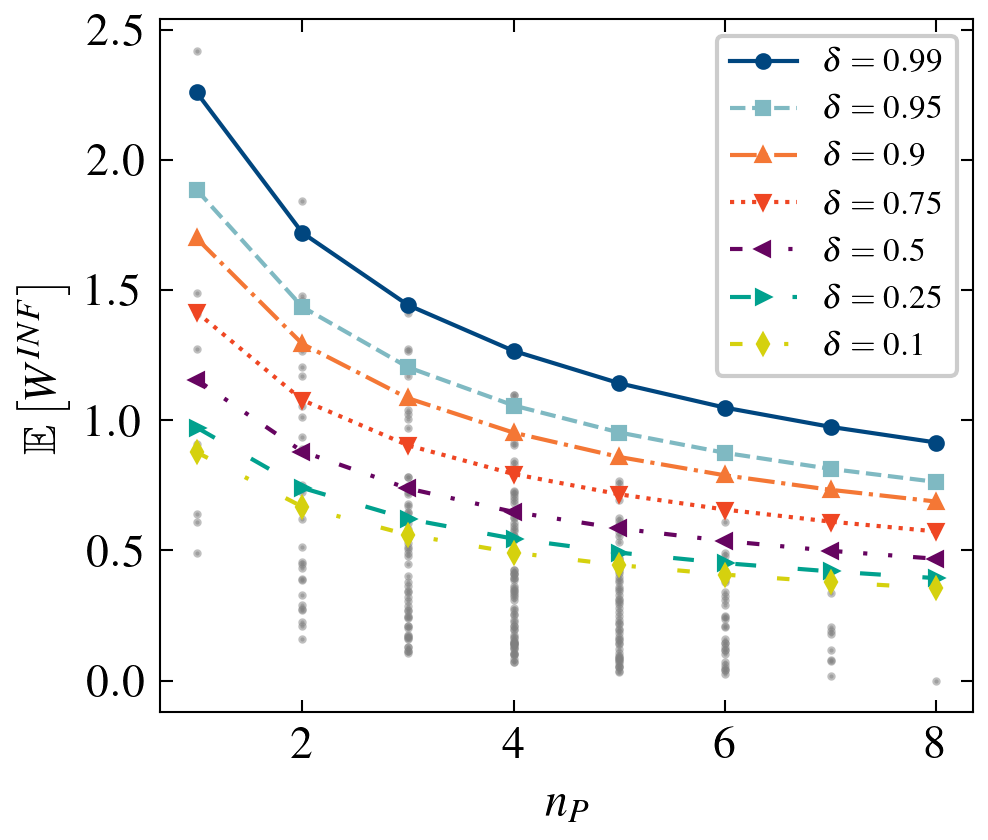

In [26]:
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_inf[k][:, sim_uniform.C_n == j + 1])
                    for j in range(sim_uniform.N_d)])
    axes.plot(np.arange(1, sim_uniform.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim_uniform.C_n, sim_uniform.ΔL[0,0], color = 'grey',
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim_uniform.ΔL[:, i][:,sim_uniform.C_n == j+1])
                            for j in range(sim_uniform.N_d)])
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{INF}\right]$')
axes.legend();
fig.savefig('figures/valuation/hoef_delta_inf_avg_' + sim_uniform.gen_path() + '.pdf')

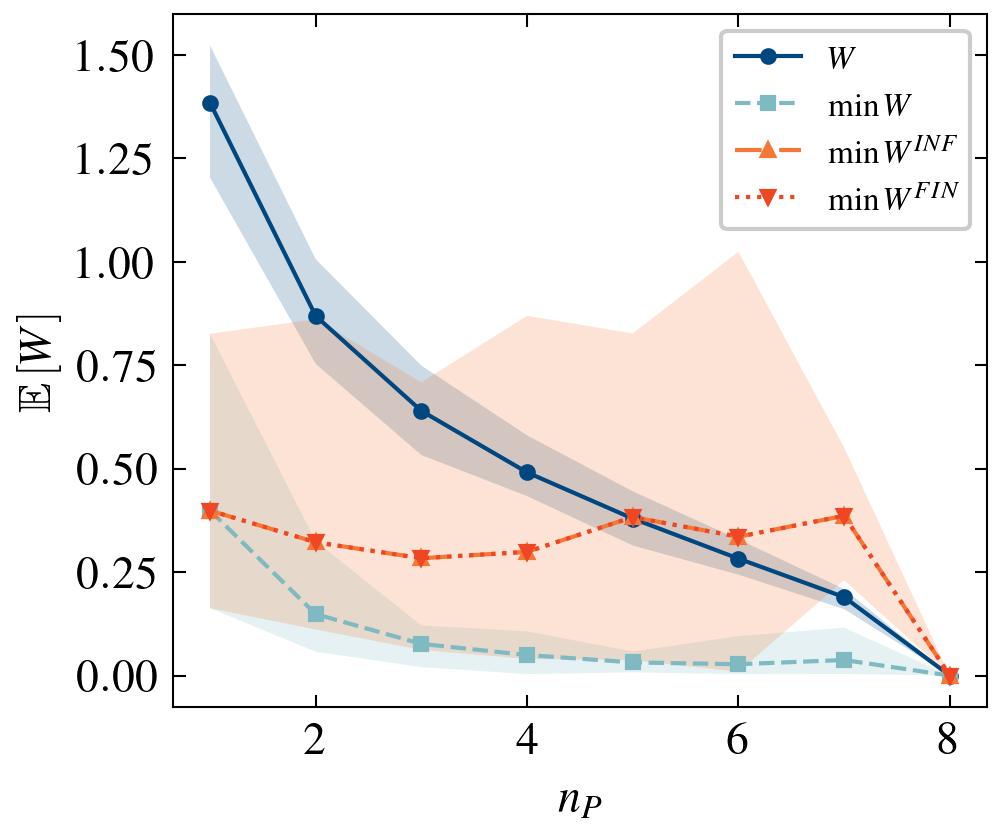

In [27]:
labels =  ["$\min W$", "$\min W^{INF}$",
           "$\min W^{FIN}$"]
fig, axes = plt.subplots()
m_idx = [0, 17, 18]
i=0
r = 1
E_W = np.array([np.mean(ΔL[:, i],axis=0)[sim_uniform.C_n == j + 1].mean() for j in range(sim_uniform.N_d)])
E_W_u = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim_uniform.C_n == j + 1],q=0.975,axis=0) for j in range(sim_uniform.N_d)])
E_W_l = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim_uniform.C_n == j + 1],q=0.025,axis=0) for j in range(sim_uniform.N_d)])
axes.plot(np.arange(1, sim_uniform.N_d + 1), E_W / K[i], label="$W$")
axes.fill_between(np.arange(1, sim_uniform.N_d + 1), E_W_l / K[i],E_W_u / K[i], alpha = 0.2)
# axes.scatter(sim_uniform.C_n, ΔL[r, i], alpha = 0.2, s=1, c='grey')
for k, i in enumerate(m_idx):
    E_L = np.zeros((sim_uniform.N_r, sim_uniform.N_d))
    E_L_u = np.zeros((sim_uniform.N_r, sim_uniform.N_d))
    E_L_l = np.zeros((sim_uniform.N_r, sim_uniform.N_d))
    for r in range(sim_uniform.N_r):
        E_L[r] = np.array([
            ΔL[r, 0][sim_uniform.C_n == j + 1][
                np.argmin(ΔL[r, i][sim_uniform.C_n == j + 1])
        ]
        for j in range(sim_uniform.N_d)
        ])
    axes.plot(np.arange(1, sim_uniform.N_d + 1), E_L.mean(axis=0) / K[i],
              label=labels[k])
    if k <= 1:
        axes.fill_between(np.arange(1, sim_uniform.N_d + 1), np.quantile(E_L,q=0.025,axis=0), np.quantile(E_L,q=0.975,axis=0) / K[i],
                  alpha=0.2)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
axes.set_xlabel(r'$n_P$')
axes.legend()
fig.savefig('figures/valuation/hoef_bound_min_' + sim_uniform.gen_path() + '.pdf')

(<Figure size 1050x900 with 2 Axes>, <Axes: >)

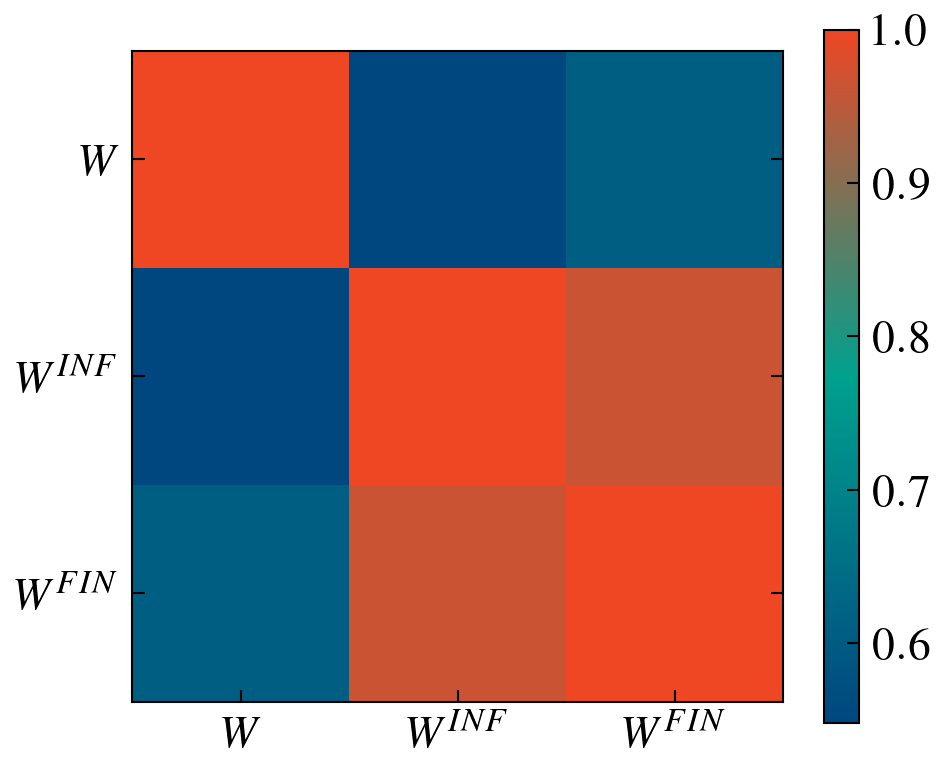

In [28]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$",
          r"$W^{INF}$",
          r"$W^{FIN}$"
          ]
m_idx = [0,17,18]
ρ = np.zeros((sim_uniform.N_r, ΔL.shape[1], ΔL.shape[1]))
for i in range(sim_uniform.N_r):
    ρ[i] = sim_uniform.calculate_correlation(ΔL[i])
ρ_hat = ρ.mean(axis=0)
sim_uniform.plot_correlations(ρ_hat, m_idx, labels,'figures/valuation/hoef_', rotation=0, place='bottom')

### Shapley Allocations

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Saurab\AppData\Local\Temp\ipykernel_9828\4253564268.py:5: RuntimeWarning: invalid value encountered in subtract
  Φ[i, j] = sim_uniform.shapley(L_r[i, j] - ΔL[i, j],
C:\Users\Saurab\Documents\GitHub\WD-Paper-Code\models\_valuators.py:81: RuntimeWarning: invalid value encountered in scalar subtract
  ϕ[i] += weight*(V_m[list(M).index(c)] - V_c_c)


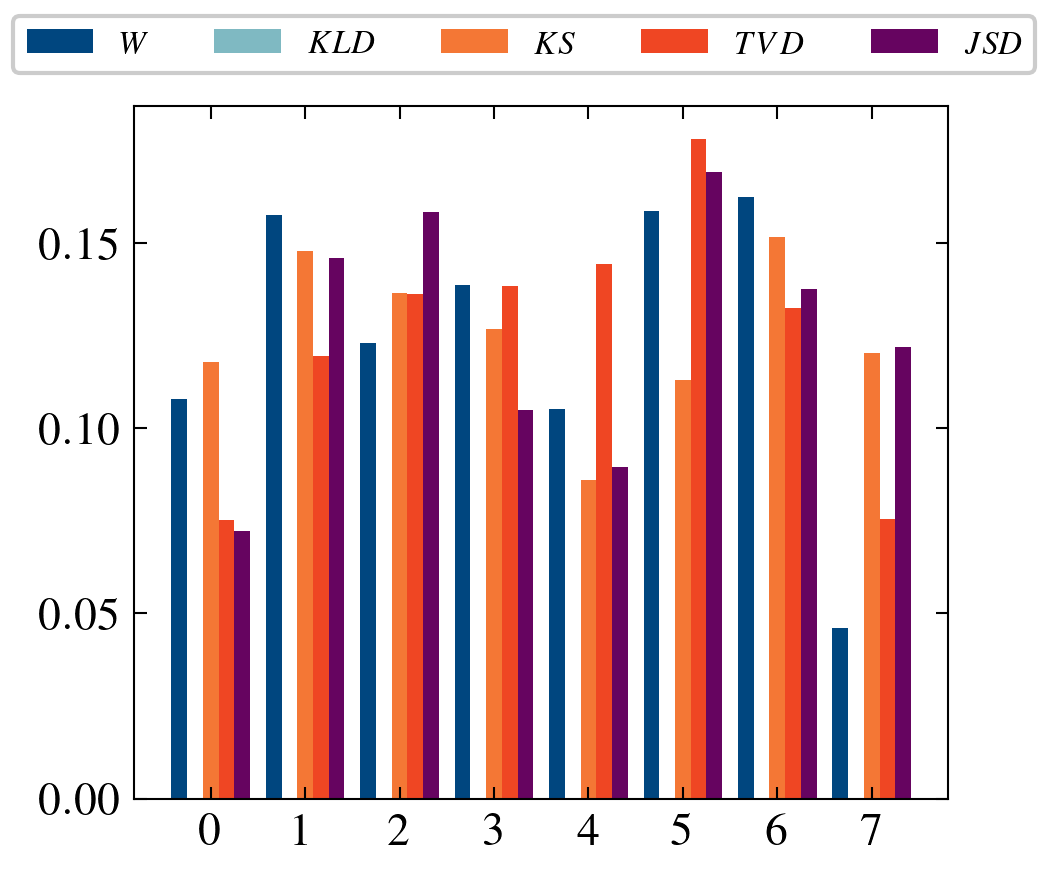

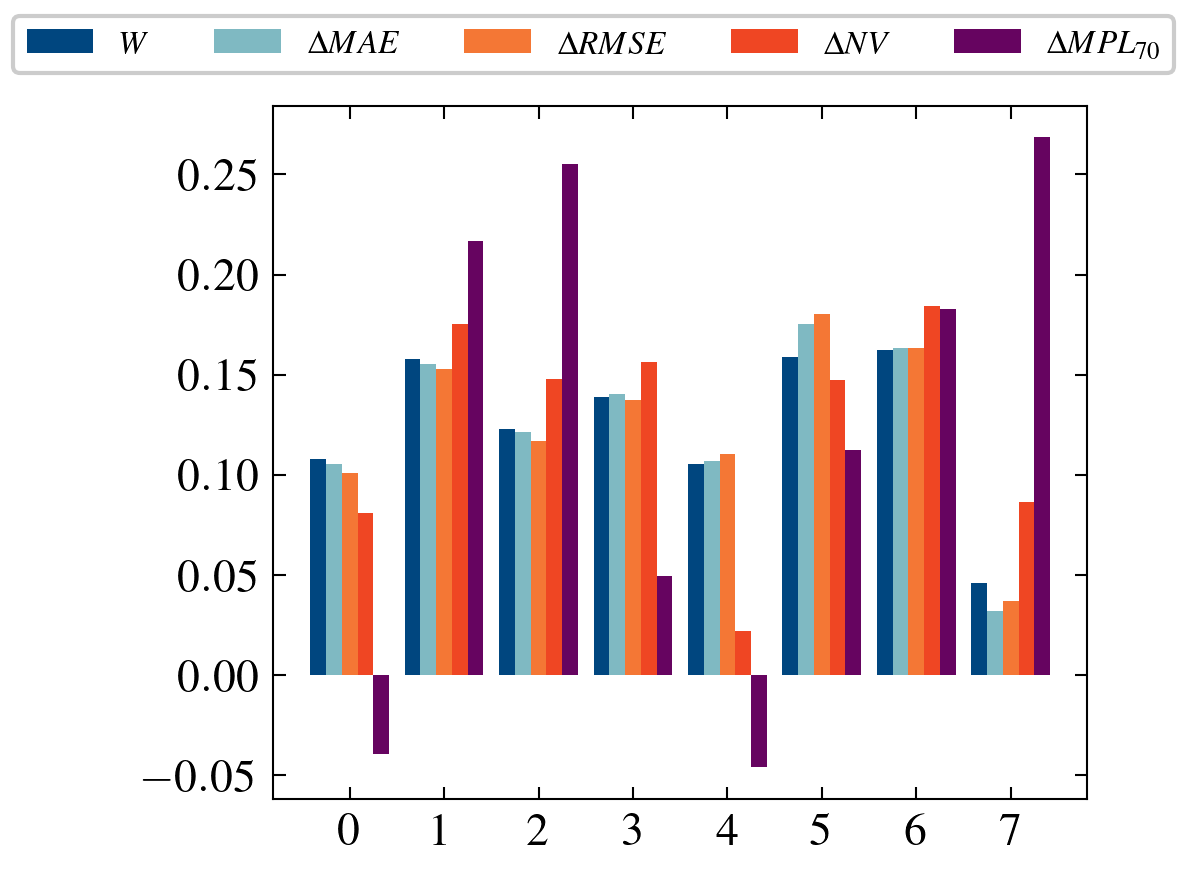

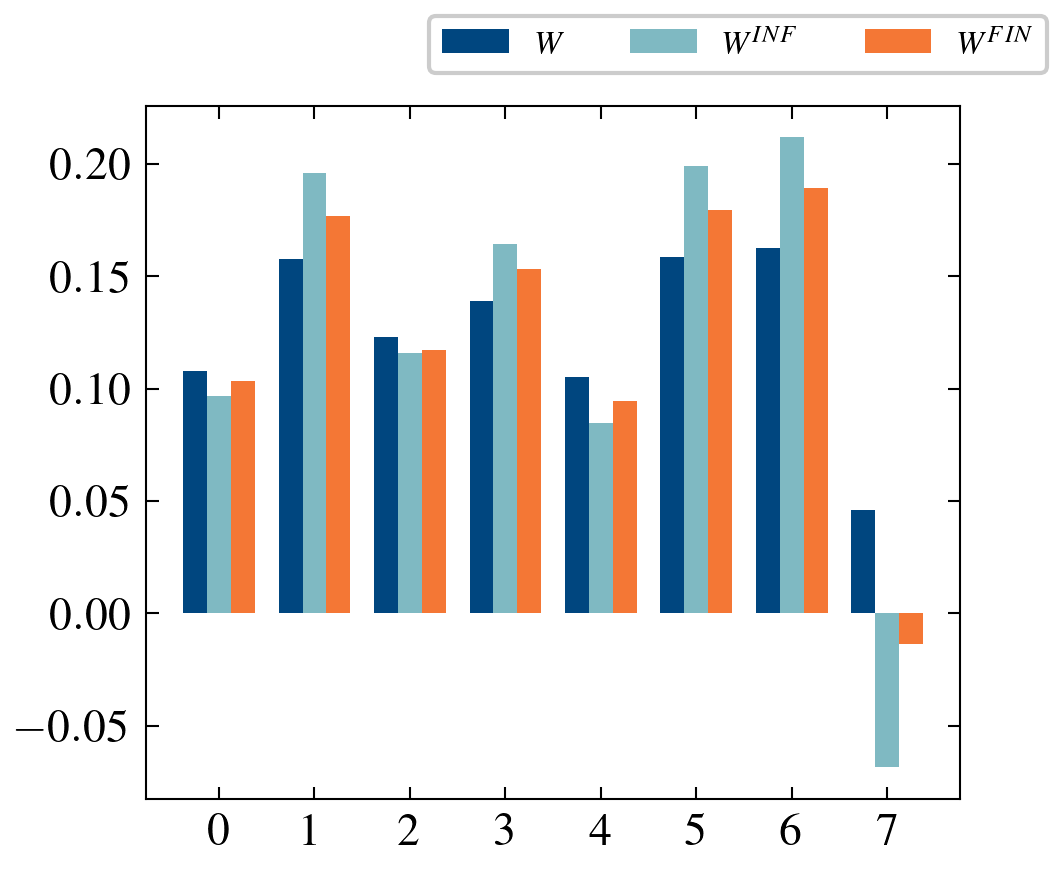

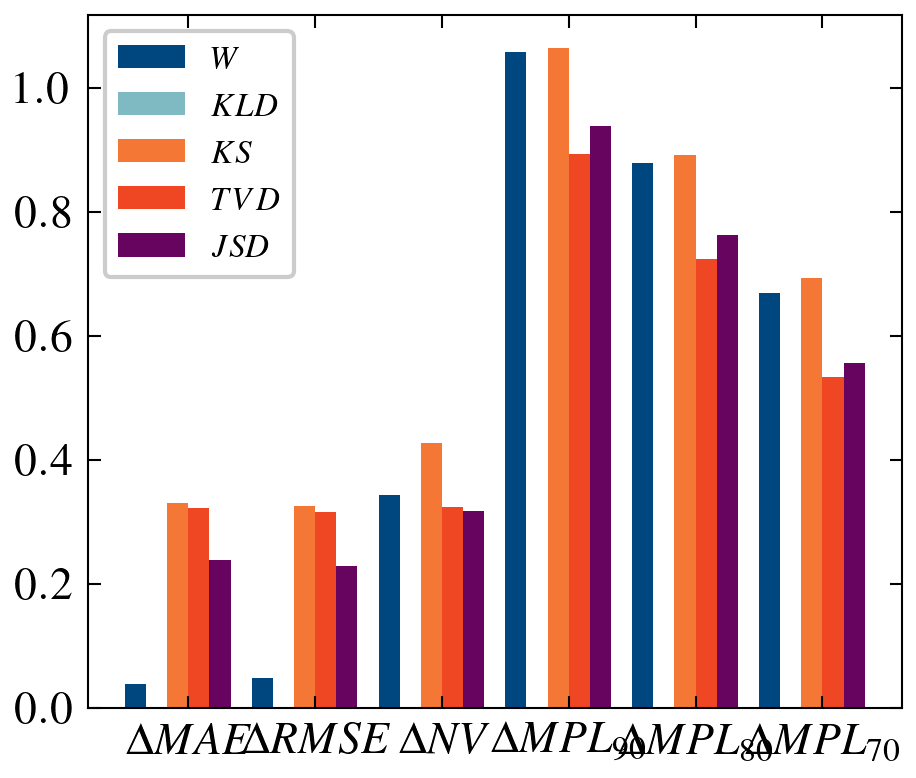

In [29]:
L_r = np.max(ΔL, axis=2)
Φ = np.zeros((sim_uniform.N_r, ΔL.shape[1], sim_uniform.N_d))
for i in tqdm(range(sim_uniform.N_r)):
    for j in range(ΔL.shape[1]):
        Φ[i, j] = sim_uniform.shapley(L_r[i, j] - ΔL[i, j],
                              np.ones(sim_uniform.N_d))
        Φ[i, j] = Φ[i, j] / Φ[i, j].sum()
r = 0
fig, axes = plt.subplots()
m_idx = [0, 1, 2, 3, 4]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_uniform.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_uniform.N_d))
fig.legend(ncol=5)
r = 0
fig, axes = plt.subplots()
m_idx = [0, 5, 6, 7, 10]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_uniform.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_uniform.N_d))
fig.legend(ncol=5)
r = 0
fig, axes = plt.subplots()
m_idx = [0, 17, 18]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_uniform.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_uniform.N_d))
fig.legend(ncol=5)


def average_value_difference(Φ, i, m_idx):
    diff = np.zeros(len(m_idx))
    for k, m in enumerate(m_idx):
        diff[k] = np.mean(np.sum(np.abs(Φ[:, i] - Φ[:, m]), axis=1))
    return diff


d_idx = [0, 1, 2, 3, 4]
m_idx = np.arange(5, 11)
diff = np.zeros((len(d_idx), len(m_idx)))
fig, axes = plt.subplots()
for k, x in enumerate(d_idx):
    diff[k] = average_value_difference(Φ, x, m_idx)
    offset = k - (len(m_idx) / 2)
    axes.bar(
        np.arange(len(m_idx)) + offset / (len(d_idx) + 1) + 0.5 * (1 / (len(d_idx) + 1)),
        diff[k],
        width=(1 / (len(d_idx) + 1)), label=labels[x], align='center')
axes.set_xticks(np.arange(len(m_idx)))
axes.set_xticklabels(np.array(labels)[m_idx])
axes.legend();

## Exponential Data

In [30]:
N_d = 8
N_r = 50
N_cf = 1
N_s = 10000
agg = 'euclidean'
Z = st.expon
α_bounds = np.array([10, 16])
β_bounds = np.array([1, 3])
seed = 1345
metrics = [WassersteinMetric(Z=Z, N_cf=N_cf),
           KullbackLieblerDivergence(Z=Z,N_cf=N_cf, est_mode='kde'),
           KolmogorovSmirnovMetric(Z=Z, N_cf=N_cf),
           TotalVariationalDistance(Z=Z,N_cf=N_cf, est_mode='kde'),
           JensenShannonDistance(Z=Z,N_cf=N_cf, est_mode='kde'),
           MeanAbsoluteError(Z=Z, N_cf=N_cf),
           RootMeanSquaredError(Z=Z, N_cf=N_cf,
                                a_min=max(np.abs(β_bounds)),
                                b_max=max(α_bounds) + max(β_bounds) - min(α_bounds)),
           Newsvendor(Z=Z, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.9, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.8, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.7, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.6, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.5, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.4, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.3, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.2, N_cf=N_cf),
           MeanPinballLoss(Z=Z, τ=0.1, N_cf=N_cf)]
sim_expon = DistValuator(N_d=N_d,
                           N_r=N_r,
                           N_s=N_s,
                           agg=agg,
                           metrics=metrics,
                           Z=Z,
                           α_bounds=α_bounds,
                           β_bounds=β_bounds,
                           seed=seed)

In [35]:
sim_expon.run('data/valuation/');

  0%|          | 0/50 [00:00<?, ?it/s]

In [31]:
filepath = 'data/valuation/dist_valuation_st_expon_N_d_8_N_r_50.pkl'
with open(filepath, 'rb') as f:
    sim_expon = pkl.load(f)

### Lipschitz Bounds

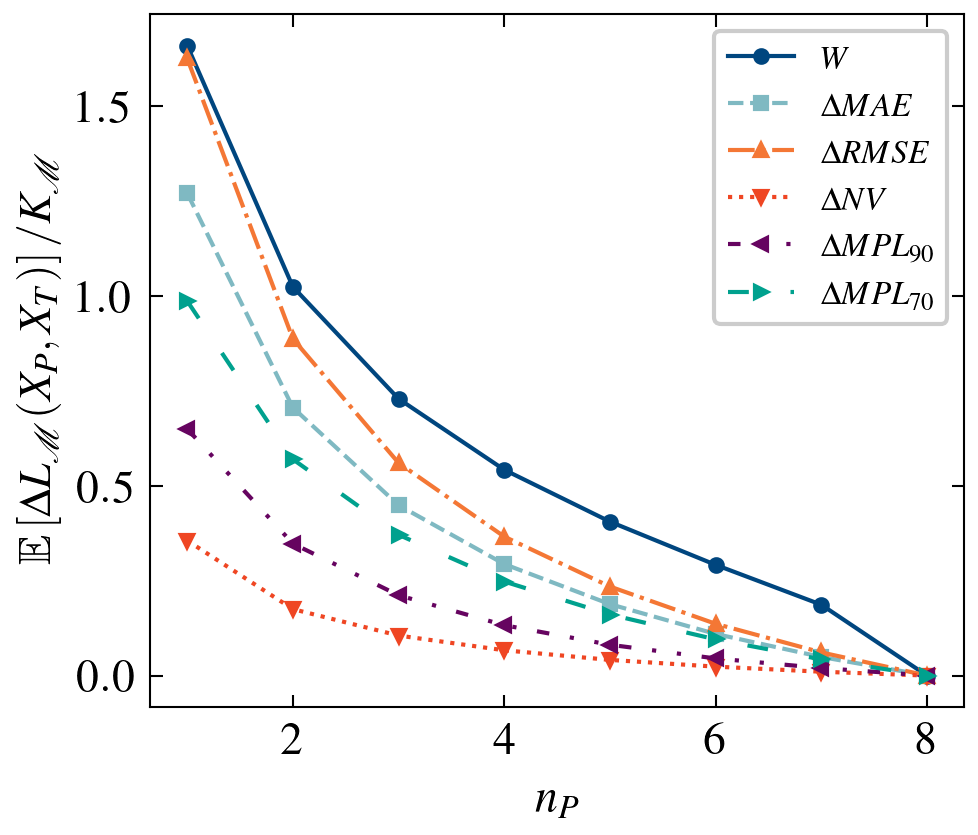

In [32]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx=[0,5,6,7,8,10]
fig, axes = sim_expon.plot_average_metrics(
    sim_expon.ΔL, sim_expon.K,
    m_idx, labels, path='figures/valuation/loss_')
axes.set_ylabel(r'$\mathbb{E}\left[\Delta L_{\mathcal{M}}(X_P,X_T)\right]/K_{\mathcal{M}}$')
fig.savefig('figures/valuation/loss_avg_' + sim_expon.gen_path() + '.pdf')

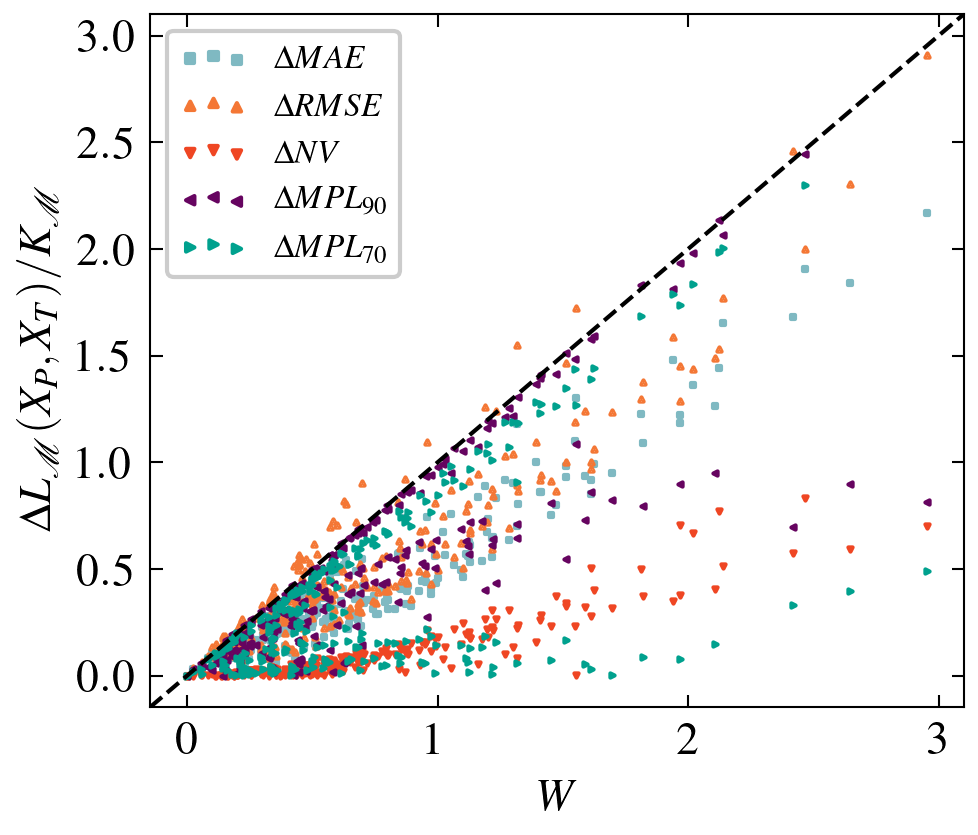

In [33]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx=[0,5,6,7,8,10]
x = 0
r = 1
fig, axes = plt.subplots()
for k, i in enumerate(k for k in m_idx if k != x):
    axes.scatter(sim_expon.ΔL[r,x],np.abs(sim_expon.ΔL[r,i]/sim_expon.K[i]),
                 marker=mark[k+1], label=labels[i],
                 s=1, alpha=1, c=cpal[k+1],rasterized=True)
max_x = np.max(sim_expon.ΔL[r,x])
axes.axline((0, 0), (max_x, max_x),  c='k',
            ls='--', zorder=1)
axes.set_xlabel(labels[x])
axes.set_ylabel(r'$\Delta L_{\mathcal{M}}(X_P,X_T)/K_{\mathcal{M}}$')
lgnd = axes.legend(markerscale=2)
fig.savefig('figures/valuation/loss_scatter_' + sim_expon.gen_path() + '.pdf');

### Task Correlations

(<Figure size 1050x900 with 2 Axes>,
 <Axes: xlabel='Source Metric (S)', ylabel='Target Metric (T)'>)

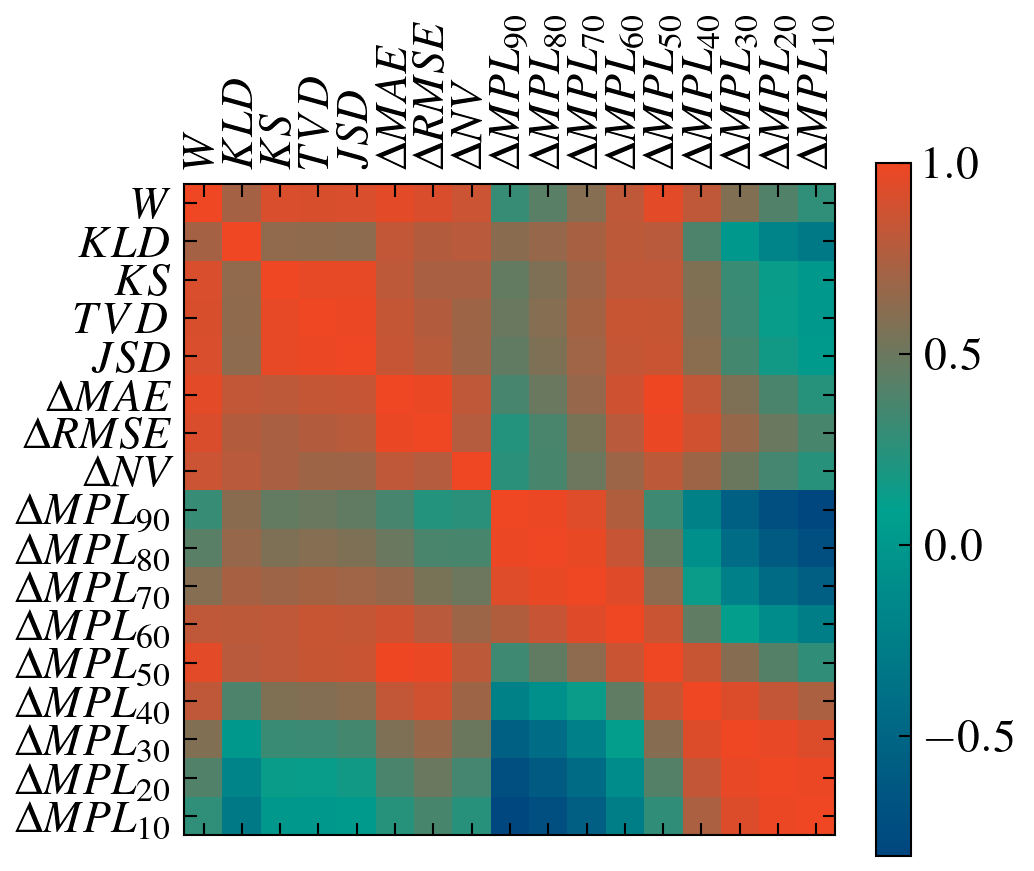

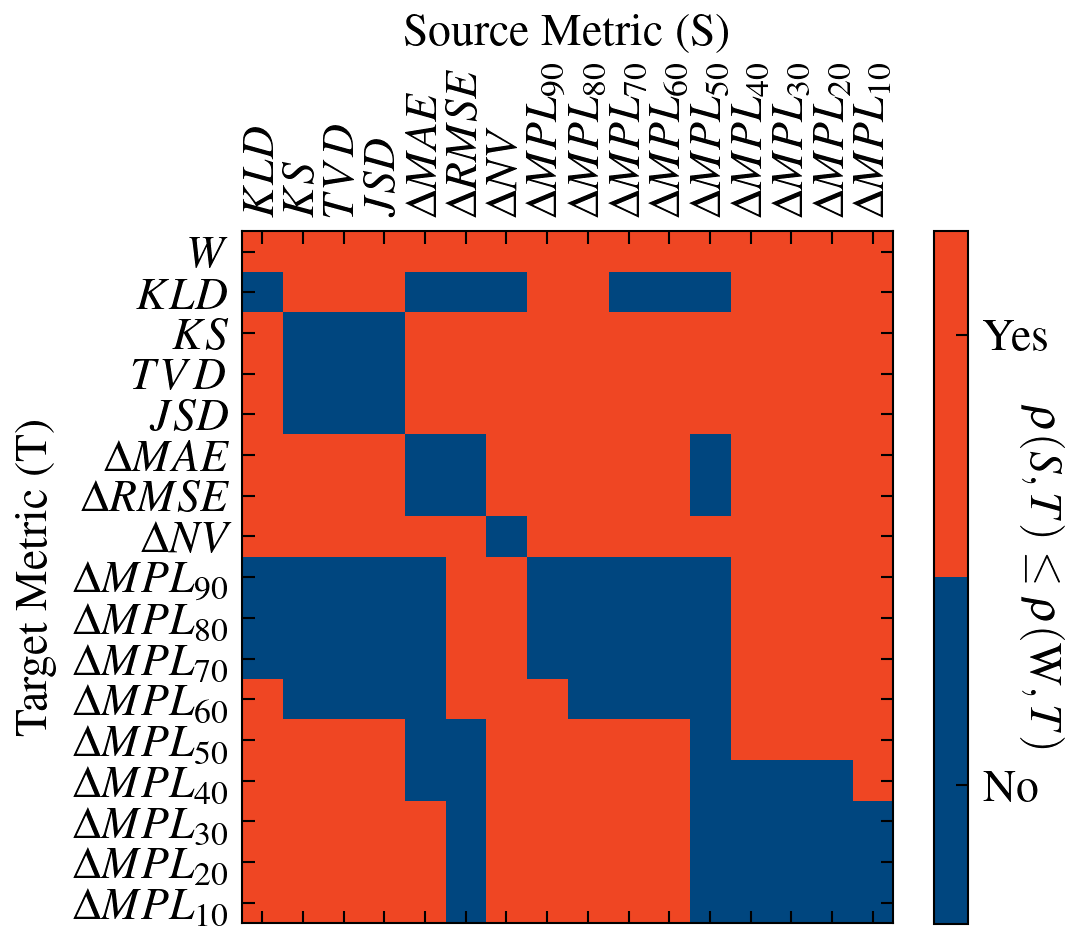

In [34]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$"
          ]
m_idx = list(np.arange(17))
sim_expon.plot_correlations(sim_expon.ρ_hat, m_idx, labels, 'figures/valuation/')
sim_expon.plot_correlation_performance(sim_expon.ρ_hat, 0, m_idx, labels, 'figures/valuation/')

In [35]:
display(pd.DataFrame(sim_expon.ρ_hat, labels, columns = labels))

,$W$,$KLD$,$KS$,$TVD$,$JSD$,$\Delta MAE$,$\Delta RMSE$,$\Delta NV$,$\Delta MPL_{90}$,$\Delta MPL_{80}$,$\Delta MPL_{70}$,$\Delta MPL_{60}$,$\Delta MPL_{50}$,$\Delta MPL_{40}$,$\Delta MPL_{30}$,$\Delta MPL_{20}$,$\Delta MPL_{10}$
$W$,1.000000,0.721894,0.920052,0.909867,0.918176,0.950040,0.920509,0.859235,0.300456,0.431094,0.598807,0.815133,0.956152,0.817832,0.584354,0.404742,0.271862
$KLD$,0.721894,1.000000,0.645860,0.638128,0.626641,0.826422,0.770861,0.792899,0.613320,0.664446,0.728510,0.807252,0.793548,0.387319,0.003632,-0.188808,-0.298225
$KS$,0.920052,0.645860,1.000000,0.969486,0.972693,0.809560,0.736462,0.734206,0.470970,0.571421,0.690420,0.816939,0.818250,0.575626,0.311403,0.129216,0.000802
$TVD$,0.909867,0.638128,0.969486,1.000000,0.983884,0.837942,0.773962,0.694978,0.494027,0.597642,0.719863,0.848673,0.846398,0.591456,0.315919,0.126513,-0.006483
$JSD$,0.918176,0.626641,0.972693,0.983884,1.000000,0.844918,0.789414,0.691638,0.462983,0.570490,0.698791,0.839047,0.856349,0.619141,0.350835,0.163122,0.029965
$\Delta MAE$,0.950040,0.826422,0.809560,0.837942,0.844918,1.000000,0.980076,0.813914,0.361679,0.494418,0.662771,0.875201,0.997390,0.827199,0.570992,0.379914,0.241229
$\Delta RMSE$,0.920509,0.770861,0.736462,0.773962,0.789414,0.980076,1.000000,0.777287,0.232275,0.370777,0.551479,0.794382,0.982340,0.885107,0.668672,0.495263,0.365442
$\Delta NV$,0.859235,0.792899,0.734206,0.694978,0.691638,0.813914,0.777287,1.000000,0.254764,0.364222,0.505944,0.689219,0.808509,0.694143,0.501198,0.353430,0.243862
$\Delta MPL_{90}$,0.300456,0.613320,0.470970,0.494027,0.462983,0.361679,0.232275,0.254764,1.000000,0.988697,0.936330,0.763559,0.325883,-0.219720,-0.554831,-0.721829,-0.814726
$\Delta MPL_{80}$,0.431094,0.664446,0.571421,0.597642,0.570490,0.494418,0.370777,0.364222,0.988697,1.000000,0.977982,0.850662,0.461509,-0.074167,-0.426832,-0.612683,-0.721275


### Hoeffding Bounds

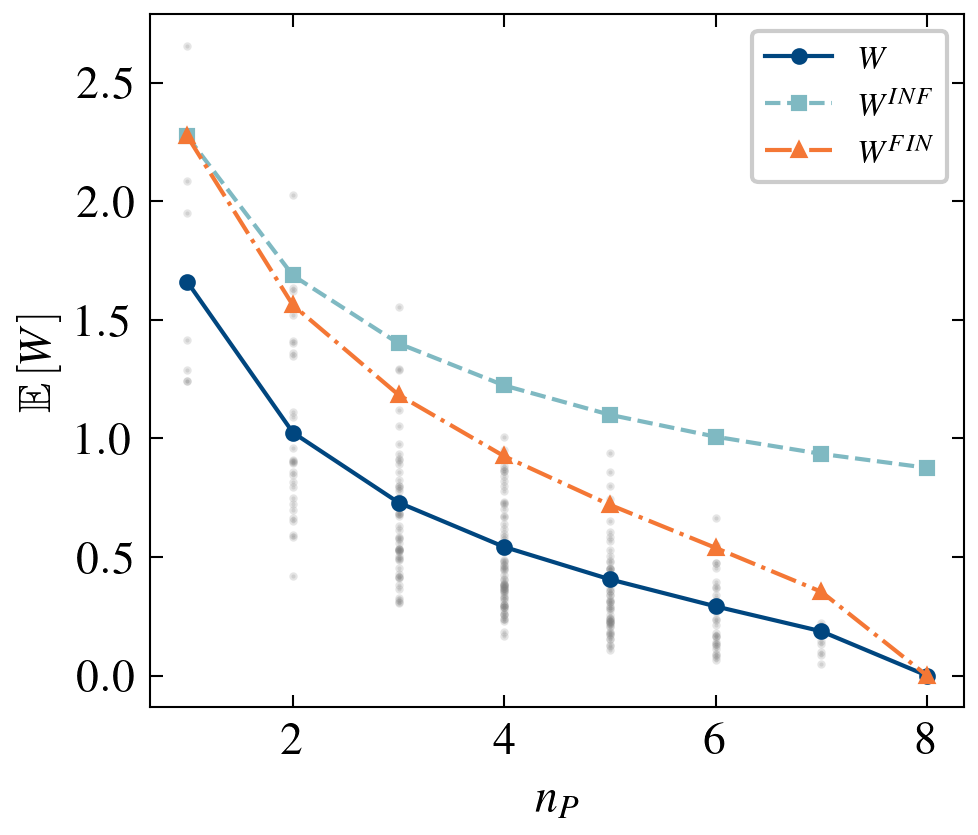

In [36]:
s_δ = [0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1]
W_inf = np.zeros((len(s_δ),sim_expon.N_r, sim_expon.N_c))
W_fin = np.zeros_like(W_inf)
W_i = sim_expon.L[:,0,:sim_expon.N_d]
for i,δ in enumerate(s_δ):
    hoef = HoeffdingBound(N=sim_expon.N_d, δ=δ)
    for r in range(sim_expon.N_r):
        W_inf[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='inf')
                             for c in sim_expon.C])
        W_fin[i,r] = np.array([hoef.closed_form(W_i[r, c], mode='fin')
                             for c in sim_expon.C])
            
labels = labels + ["$W^{INF}$","$W^{FIN}$"]

ΔL = np.column_stack([sim_expon.ΔL,np.stack([W_inf[1],W_fin[1]], axis=1)])
K = np.hstack((sim_expon.K, [1,1]))
m_idx = [0, 17, 18]
fig, axes = sim_expon.plot_average_metrics(ΔL, K, m_idx, labels, path='figures/valuation/hoef_bound_')
axes.scatter(sim_expon.C_n, sim_expon.ΔL[0,0], c='grey', alpha = 0.2, s=1)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
fig.savefig('figures/valuation/hoef_bound_avg_' + sim_expon.gen_path() + '.pdf')

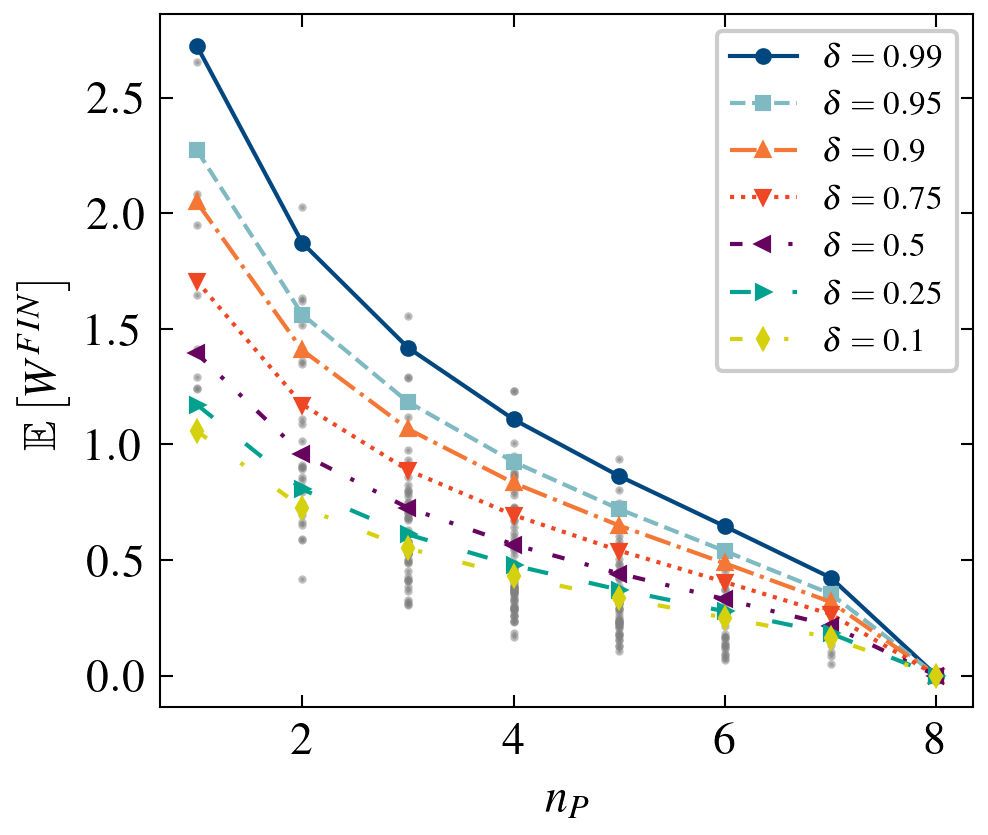

In [37]:
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_fin[k][:, sim_expon.C_n == j + 1])
                    for j in range(sim_expon.N_d)])
    axes.plot(np.arange(1, sim_expon.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim_expon.C_n, sim_expon.ΔL[0,0], color = 'grey', 
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim_expon.ΔL[:, i][:,sim_expon.C_n == j+1])
                            for j in range(sim_expon.N_d)])
# axes.plot(np.arange(1, sim.N_d + 1), E_w/ K[i],
#               label=labels[k], c = cpal[0], ls = '-', marker = '')
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{FIN}\right]$')
axes.legend();
fig.savefig('figures/valuation/hoef_delta_fin_avg_' + sim_expon.gen_path() + '.pdf')

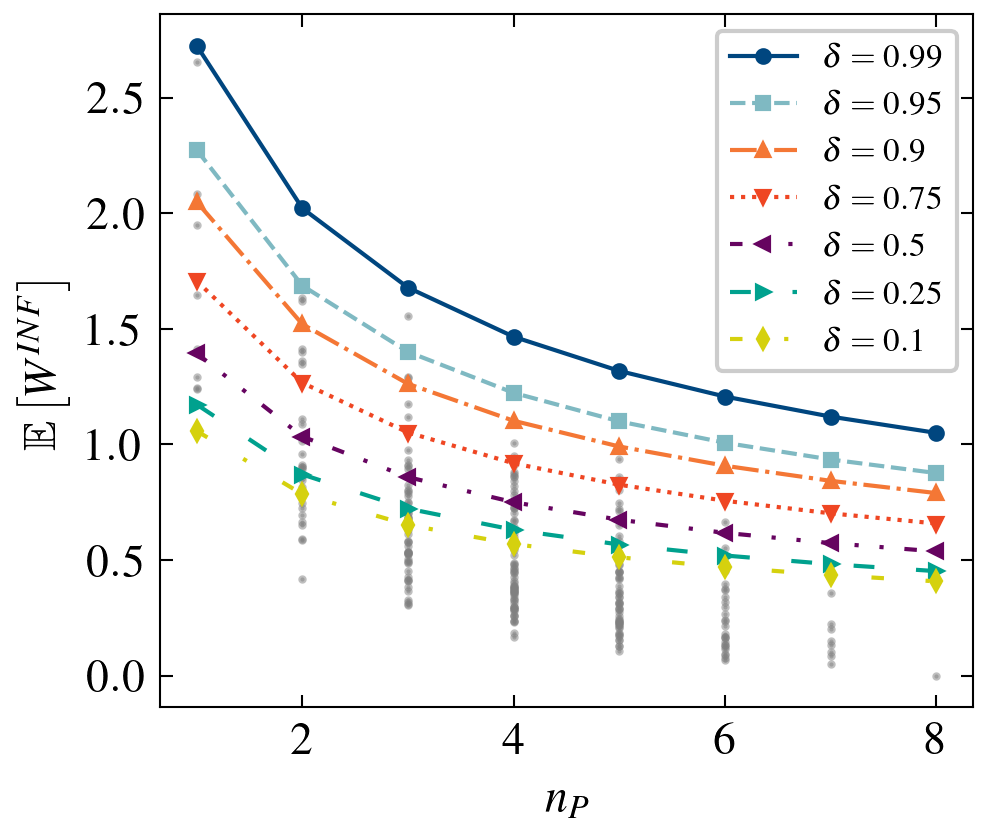

In [38]:
i = 0
fig,axes = plt.subplots()
for k, δ in enumerate(s_δ):
    E_hoef = np.array([np.mean(W_inf[k][:, sim_expon.C_n == j + 1])
                    for j in range(sim_expon.N_d)])
    axes.plot(np.arange(1, sim_expon.N_d + 1), E_hoef / K[i],
              label=r'$\delta = {}$'.format(δ))
axes.scatter(sim_expon.C_n, sim_expon.ΔL[0,0], color = 'grey',
             alpha=0.5, s=1, zorder=0)
E_w = np.array([np.mean(sim_expon.ΔL[:, i][:,sim_expon.C_n == j+1])
                            for j in range(sim_expon.N_d)])
axes.set_xlabel('$n_P$')
axes.set_ylabel(r'$\mathbb{E}\left[W^{INF}\right]$')
axes.legend();
fig.savefig('figures/valuation/hoef_delta_inf_avg_' + sim_expon.gen_path() + '.pdf')

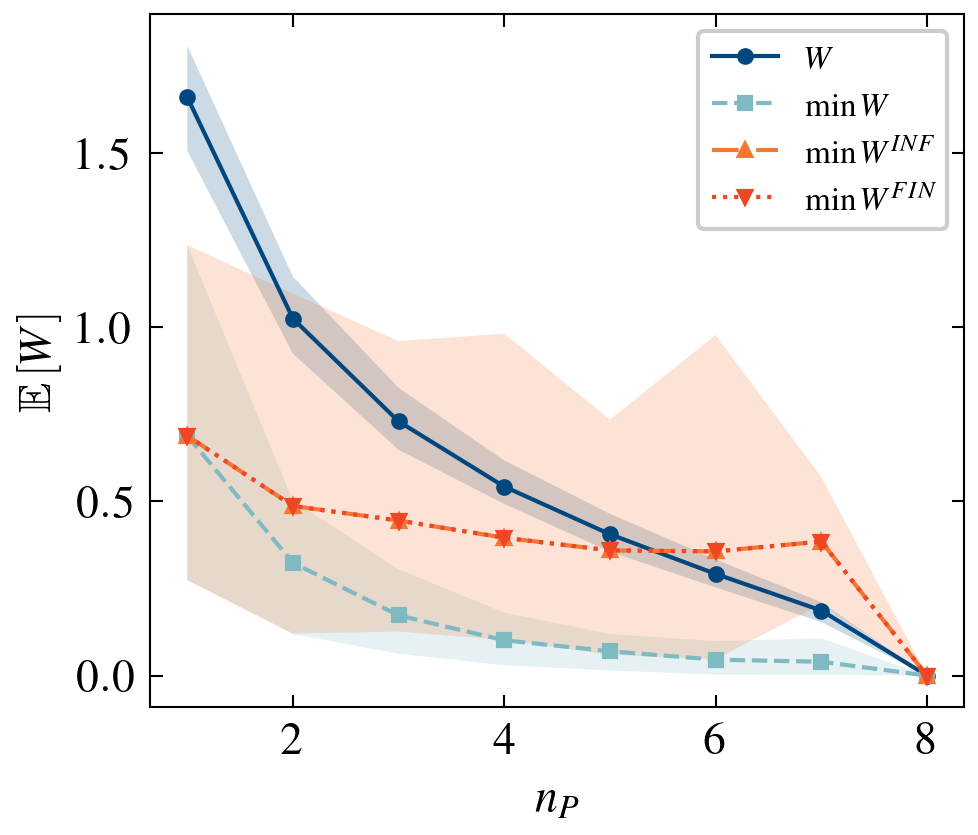

In [39]:
labels =  ["$\min W$", "$\min W^{INF}$",
           "$\min W^{FIN}$"]
fig, axes = plt.subplots()
m_idx = [0, 17, 18]
i=0
r = 1
E_W = np.array([np.mean(ΔL[:, i],axis=0)[sim_expon.C_n == j + 1].mean() for j in range(sim_expon.N_d)])
E_W_u = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim_expon.C_n == j + 1],q=0.975,axis=0) for j in range(sim_expon.N_d)])
E_W_l = np.array([np.quantile(np.mean(ΔL[:, i],axis=0)[sim_expon.C_n == j + 1],q=0.025,axis=0) for j in range(sim_expon.N_d)])
axes.plot(np.arange(1, sim_expon.N_d + 1), E_W / K[i], label="$W$")
axes.fill_between(np.arange(1, sim_expon.N_d + 1), E_W_l / K[i],E_W_u / K[i], alpha = 0.2)
# axes.scatter(sim_expon.C_n, ΔL[r, i], alpha = 0.2, s=1, c='grey')
for k, i in enumerate(m_idx):
    E_L = np.zeros((sim_expon.N_r, sim_expon.N_d))
    E_L_u = np.zeros((sim_expon.N_r, sim_expon.N_d))
    E_L_l = np.zeros((sim_expon.N_r, sim_expon.N_d))
    for r in range(sim_expon.N_r):
        E_L[r] = np.array([
            ΔL[r, 0][sim_expon.C_n == j + 1][
                np.argmin(ΔL[r, i][sim_expon.C_n == j + 1])
        ]
        for j in range(sim_expon.N_d)
        ])
    axes.plot(np.arange(1, sim_expon.N_d + 1), E_L.mean(axis=0) / K[i],
              label=labels[k])
    if k <= 1:
        axes.fill_between(np.arange(1, sim_expon.N_d + 1), np.quantile(E_L,q=0.025,axis=0), np.quantile(E_L,q=0.975,axis=0) / K[i],
                  alpha=0.2)
axes.set_ylabel(r'$\mathbb{E}\left[ W \right]$')
axes.set_xlabel(r'$n_P$')
axes.legend()
fig.savefig('figures/valuation/hoef_bound_min_' + sim_expon.gen_path() + '.pdf')

(<Figure size 1050x900 with 2 Axes>, <Axes: >)

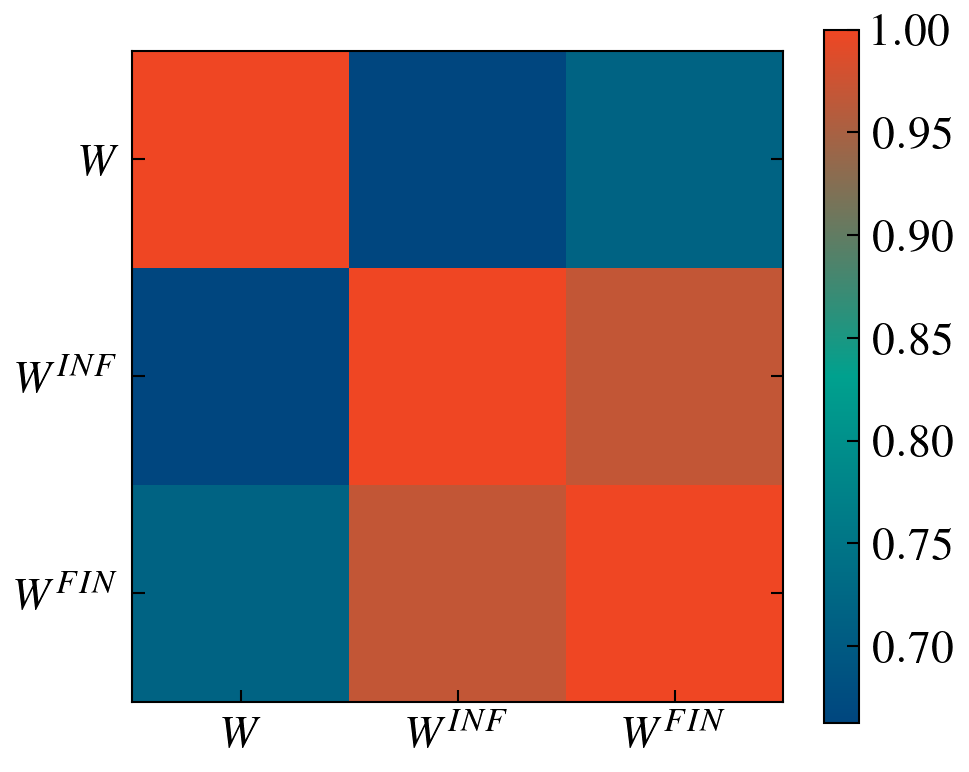

In [40]:
labels = ["$W$",
          "$KLD$",
          "$KS$",
          "$TVD$",
          "$JSD$",
          "$\Delta MAE$",
          "$\Delta RMSE$",
          "$\Delta NV$",
          "$\Delta MPL_{90}$",
          "$\Delta MPL_{80}$",
          "$\Delta MPL_{70}$",
          "$\Delta MPL_{60}$",
          "$\Delta MPL_{50}$",
          "$\Delta MPL_{40}$",
          "$\Delta MPL_{30}$",
          "$\Delta MPL_{20}$",
          "$\Delta MPL_{10}$",
          r"$W^{INF}$",
          r"$W^{FIN}$"
          ]
m_idx = [0,17,18]
ρ = np.zeros((sim_expon.N_r, ΔL.shape[1], ΔL.shape[1]))
for i in range(sim_expon.N_r):
    ρ[i] = sim_expon.calculate_correlation(ΔL[i])
ρ_hat = ρ.mean(axis=0)
sim_expon.plot_correlations(ρ_hat, m_idx, labels,'figures/valuation/hoef_', rotation=0, place='bottom')

### Shapley Allocations

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Saurab\AppData\Local\Temp\ipykernel_9828\1832124962.py:5: RuntimeWarning: invalid value encountered in subtract
  Φ[i, j] = sim_expon.shapley(L_r[i, j] - ΔL[i, j],
C:\Users\Saurab\Documents\GitHub\WD-Paper-Code\models\_valuators.py:81: RuntimeWarning: invalid value encountered in scalar subtract
  ϕ[i] += weight*(V_m[list(M).index(c)] - V_c_c)


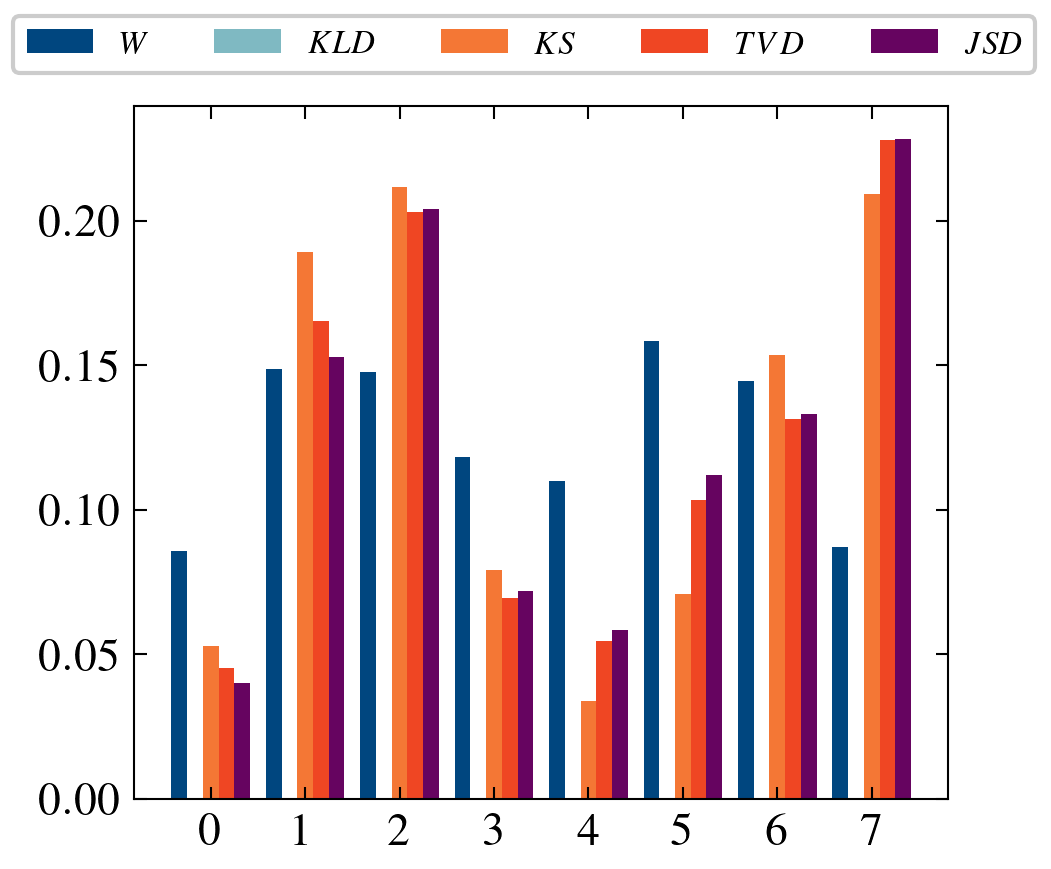

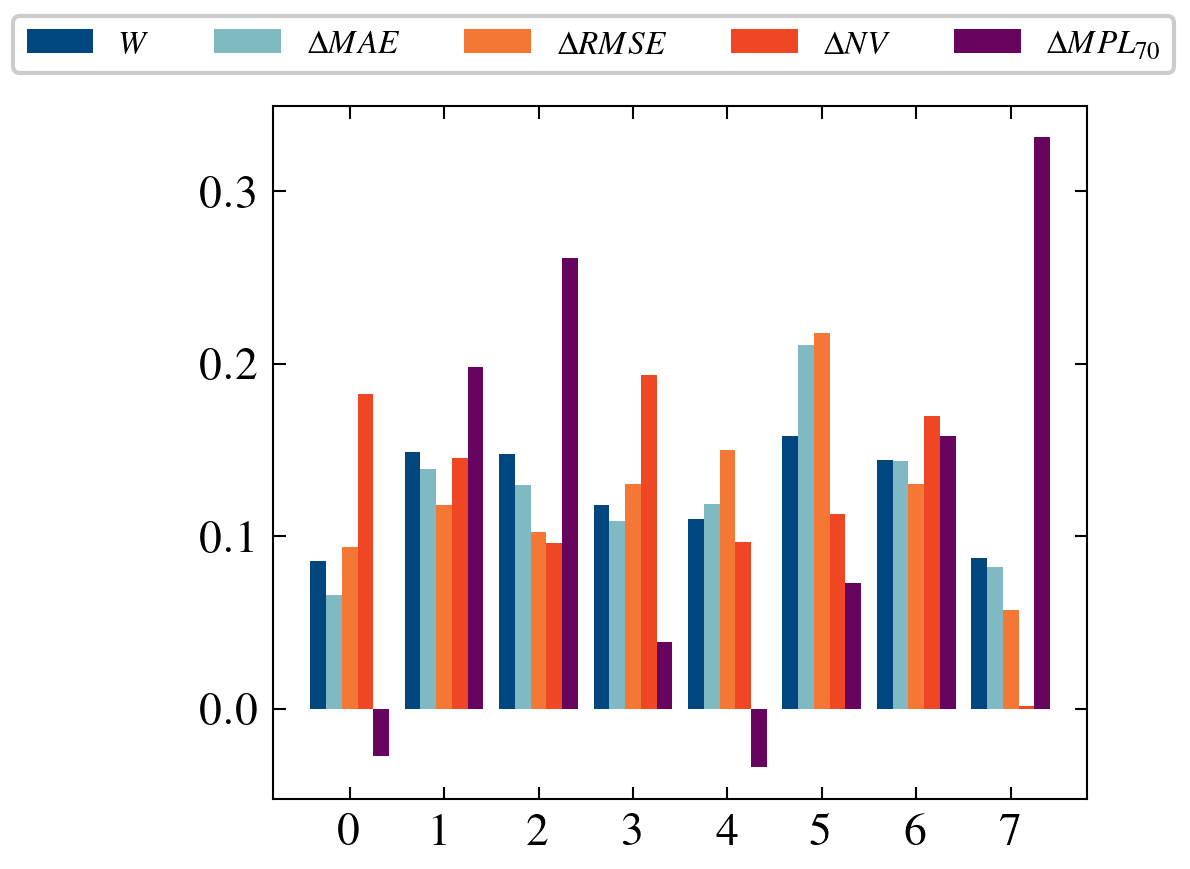

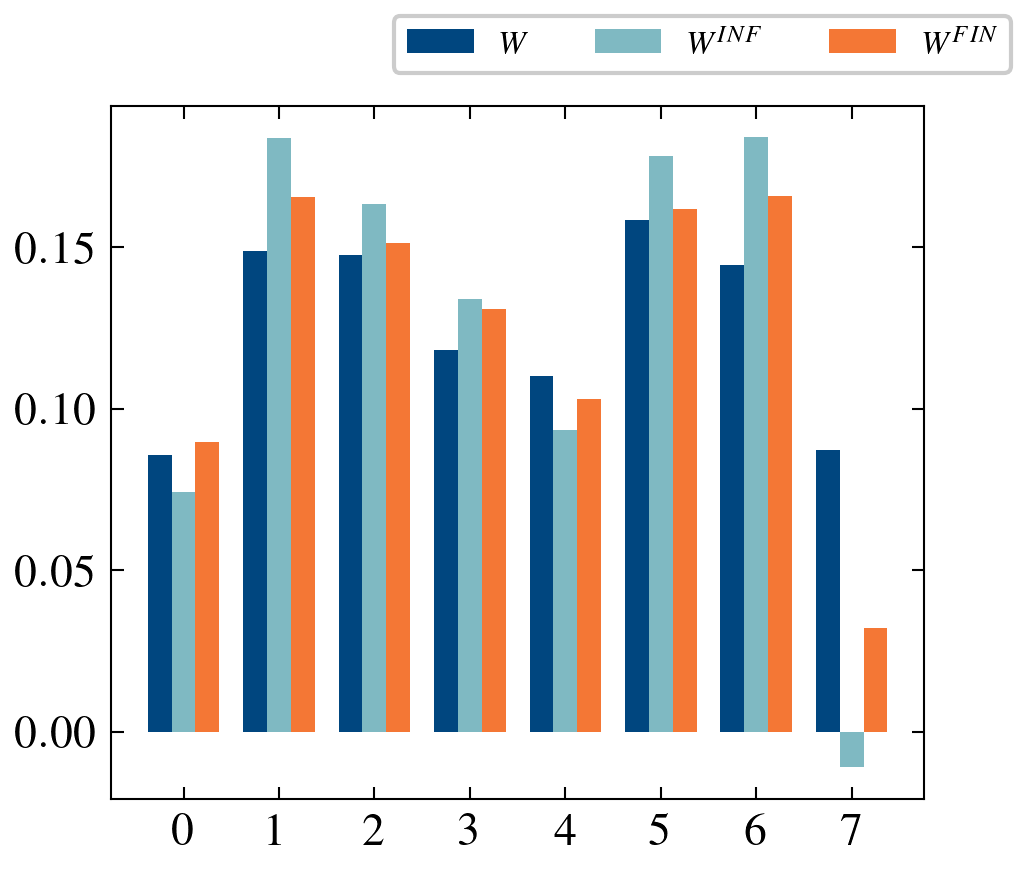

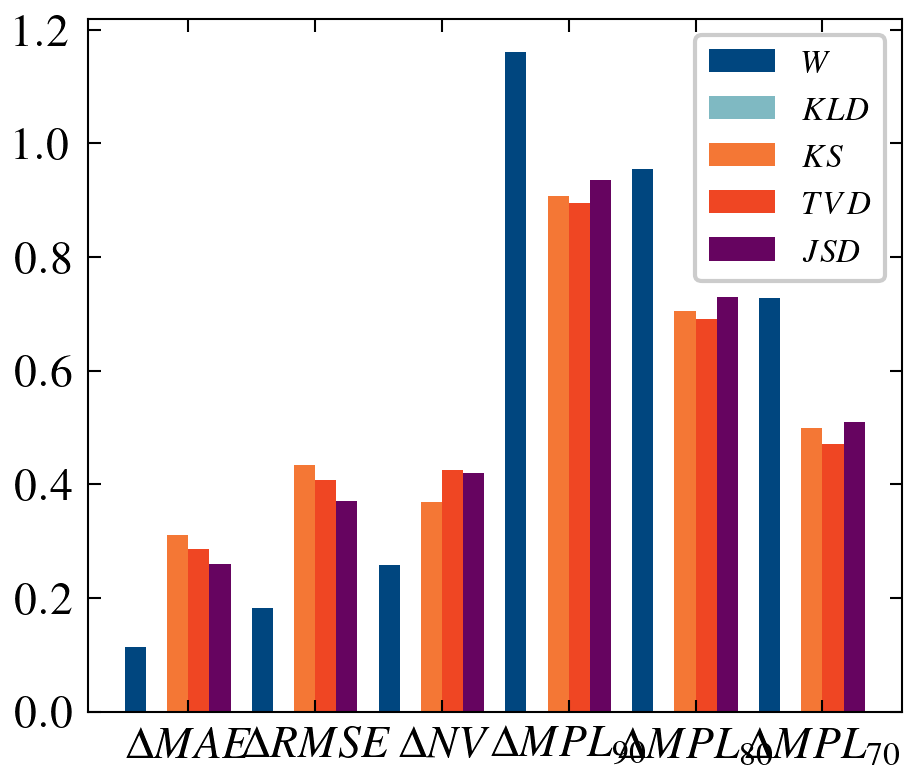

In [41]:
L_r = np.max(ΔL, axis=2)
Φ = np.zeros((sim_expon.N_r, ΔL.shape[1], sim_expon.N_d))
for i in tqdm(range(sim_expon.N_r)):
    for j in range(ΔL.shape[1]):
        Φ[i, j] = sim_expon.shapley(L_r[i, j] - ΔL[i, j],
                              np.ones(sim_expon.N_d))
        Φ[i, j] = Φ[i, j] / Φ[i, j].sum()
r = 0
fig, axes = plt.subplots()
m_idx = [0, 1, 2, 3, 4]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_expon.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_expon.N_d))
fig.legend(ncol=5)
r = 0
fig, axes = plt.subplots()
m_idx = [0, 5, 6, 7, 10]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_expon.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_expon.N_d))
fig.legend(ncol=5)
r = 0
fig, axes = plt.subplots()
m_idx = [0, 17, 18]
N_m = len(m_idx)
for k, i in enumerate(m_idx):
    offset = k - (N_m / 2)
    axes.bar(np.arange(sim_expon.N_d) + offset / (N_m + 1) + 0.5 * (1 / (N_m + 1)),
             Φ[r, i],
             width=(1 / (N_m + 1)), label=labels[i],
             align='center')
axes.set_xticks(np.arange(sim_expon.N_d))
fig.legend(ncol=5)


def average_value_difference(Φ, i, m_idx):
    diff = np.zeros(len(m_idx))
    for k, m in enumerate(m_idx):
        diff[k] = np.mean(np.sum(np.abs(Φ[:, i] - Φ[:, m]), axis=1))
    return diff


d_idx = [0, 1, 2, 3, 4]
m_idx = np.arange(5, 11)
diff = np.zeros((len(d_idx), len(m_idx)))
fig, axes = plt.subplots()
for k, x in enumerate(d_idx):
    diff[k] = average_value_difference(Φ, x, m_idx)
    offset = k - (len(m_idx) / 2)
    axes.bar(
        np.arange(len(m_idx)) + offset / (len(d_idx) + 1) + 0.5 * (1 / (len(d_idx) + 1)),
        diff[k],
        width=(1 / (len(d_idx) + 1)), label=labels[x], align='center')
axes.set_xticks(np.arange(len(m_idx)))
axes.set_xticklabels(np.array(labels)[m_idx])
axes.legend();

## KLD Instability

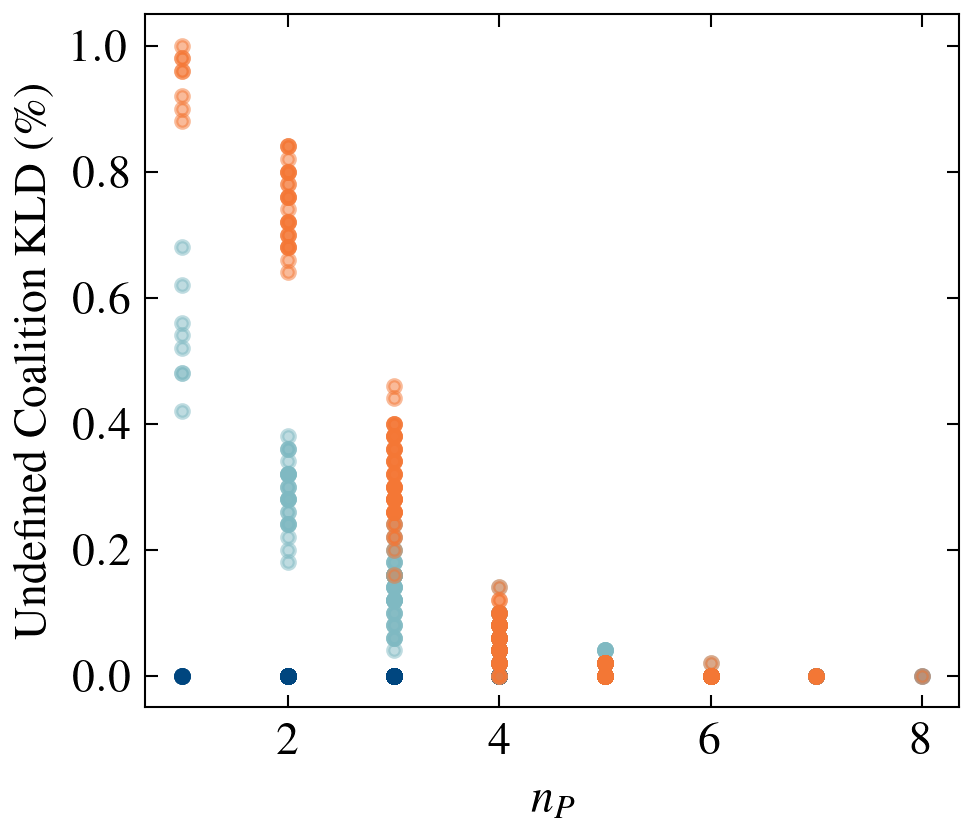

In [42]:
i = 1
fig, axes = plt.subplots()
axes.scatter(sim.C_n,np.isinf(sim.ΔL[:,i]).sum(axis=0)/50, alpha = 0.5, label = 'Gaussian')
axes.scatter(sim.C_n,np.isinf(sim_uniform.ΔL[:,i]).sum(axis=0)/50, alpha = 0.5, label = 'Uniform')
axes.scatter(sim.C_n,np.isinf(sim_expon.ΔL[:,i]).sum(axis=0)/50, alpha = 0.5, label = 'Exponential')
axes.set_ylabel('Undefined Coalition KLD (\%)');
axes.set_xlabel('$n_P$');